In [2]:
from problem import * # the code that largely constitutes these experiments.
#from bokeh.io import output_notebook
%matplotlib inline
#output_notebook()
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This statistical investigation takes a look at how people use wikipedia. Wikipedia makes available stats on how people visit a wikipedia page, be it through a link from a google search or a link on another wikipedia page etc. This type of information is sometimes called a 'clickstream', and the next cell shows how this is manifested in a SQL database.  The exhuastive list of so-called 'referers' is:
- google
- bing
- yahoo
- wikipedia's own search feature.
- twitter
- facebook
- other wikipedia pages. This information is not aggregated; each page which links to the 'current' page has its own count.
- other. 
Each referer shows up as a value in the table as a string with a 'other-' prefix, so google is 'other-google', and so on.

The raw data for this notebook counts wikipedia traffic from February 2015. The sources of this data are hosted [on datahub](http://datahub.io/dataset/wikipedia-clickstream). The website there makes clear some of the finer points involved in the data collection, but I'll summarize the most relevant ones here:

## The schema of the available data

In [32]:
conn = psycopg2.connect(dbname="wiki", user="shalom", host="localhost", password="")
pd.read_sql("SELECT * FROM wikithresh LIMIT 25",conn)

,referer_id,id,n,referer,title,type
0,12610,172570,60,Grand_Unified_Theory,Planck_scale,link
1,16113773,172570,61,Large_extra_dimension,Planck_scale,link
2,9598,172570,96,Electronvolt,Planck_scale,link
3,180236,172570,14,Greisen–Zatsepin–Kuzmin_limit,Planck_scale,link
4,308955,172570,68,Grand_unification_energy,Planck_scale,link
5,38992,172570,14,Cosmological_constant,Planck_scale,link
6,10296,172570,22,EPR_paradox,Planck_scale,link
7,NaN,3825197,23,other-other,Planet_Earth_(song),other
8,19677583,3825197,34,Planet_Earth,Planet_Earth_(song),link
9,31511934,3825197,12,Seeking_Major_Tom,Planet_Earth_(song),link


This information lends itself to many sorts of statistical investigations. The type of questions I'm interested in here are "which categories of wikipedia pages have characteristic access patterns?" A distinct usage pattern might mean:

- a noteworthy proportion of traffic from within wikipedia compared to traffic from search engines.
- a noteworthy distribution of which search engines people 
- a correlation between some statistic of a category and that of another category

Because I'm interested in proportions like this, wikipedia pages without many views would provide prohibitively much noise. For instance, there are many pages like ' ' which have only been visited via ' ', and that does not point to interesting results so much as the coincidence of a few people happening to have done google searches. The exact cutoff I use is a page having a total of greater than 300 views. This number was not decided through any interesting, rigorous way. In fact, my first inclination was to made that threshold a parameter to queries by making a tresholded SQL view. It turns out the queries here are massively sped up by storing an index on 'title', and such bookeeping requires tables which are not dynamically formed.

In order to have a feel for what is 'noteworthy', it is useful to look at some basic descriptive statistics on the data we're working with:

In [ ]:
data_characteristics()

## Microsoft Problem

Let's first examine the question 'do people use the microsoft bing search engine notably often to look at microsoft-related wikipedia pages?' I would expect so, because
* microsoft makes bing the default search engine on microsoft stuff, and many people tend not to switch away from defaults.
* people who use microsoft products may be most likely to be reading about microsoft products.

In [2]:
import instances.ms
ms_problem = WikiProblem(instances.ms.inst, selection={'google','bing','yahoo'})

Preparing problem instance.
Azure_Services_Platform does not exist
Microsoft_Edge does not exist
United_Fruit does not exist
Http does not exist
Filling tables with query results


In [ ]:
## Reading these graphs



microsoft
           yahoo       bing     google
count  50.000000  50.000000  50.000000
mean    0.034059   0.067961   0.897981
std     0.048640   0.042817   0.082622
min     0.000000   0.028783   0.541253
25%     0.016420   0.045996   0.898453
50%     0.020599   0.056447   0.921021
75%     0.031506   0.069733   0.932386
max     0.294599   0.274025   0.962312
The first item in these tuples represents the pearson correlation coefficient.

The second item in these tuples represents the p-value.

                                       yahoo  \
companies   (0.0639010833196, 0.93609891668)   
random     (0.298437435912, 0.0352798306049)   
technical  (-0.248492284723, 0.488762868772)   

                                        bing  \
companies  (-0.574025413868, 0.425974586132)   
random      (0.227480636341, 0.112115796041)   
technical   (0.217486108829, 0.546120802648)   

                                       google  
companies   (-0.370295782573, 0.629704217427)  
random      (0.31238

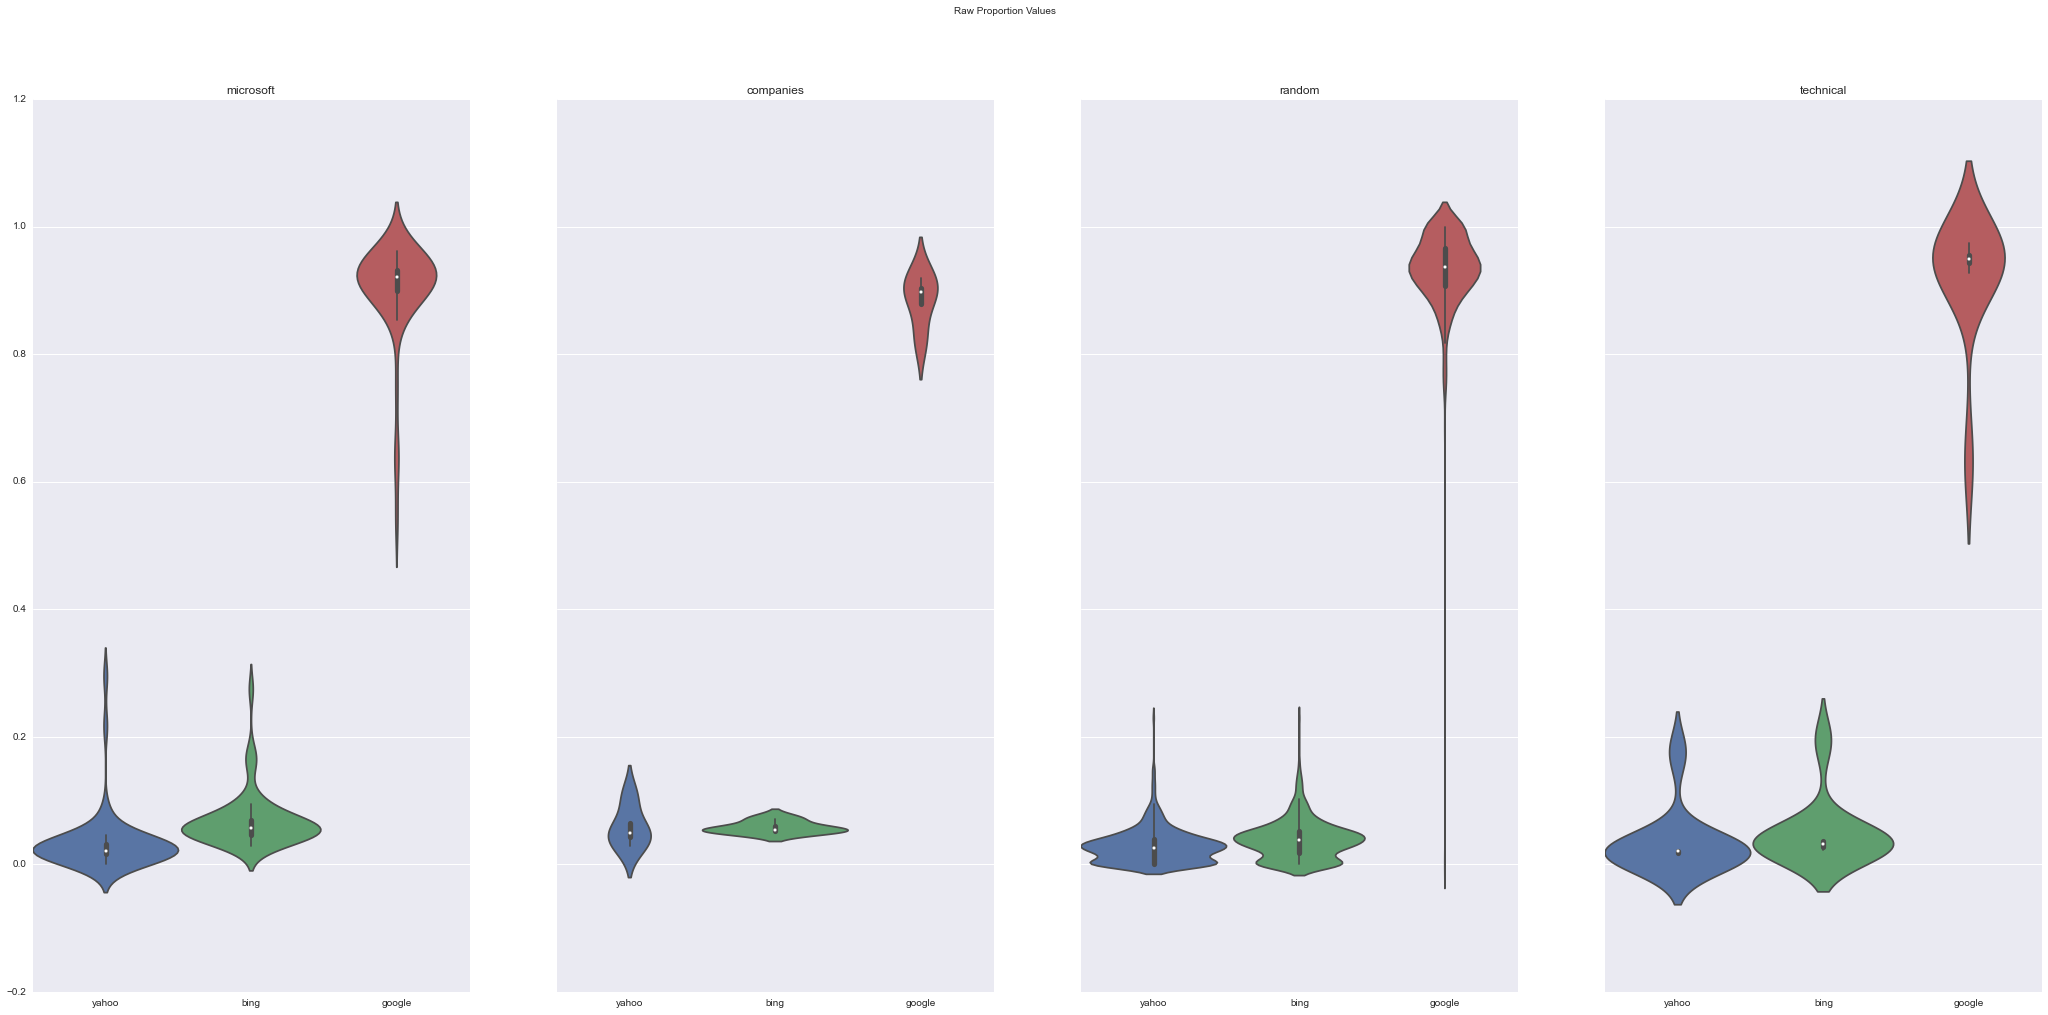

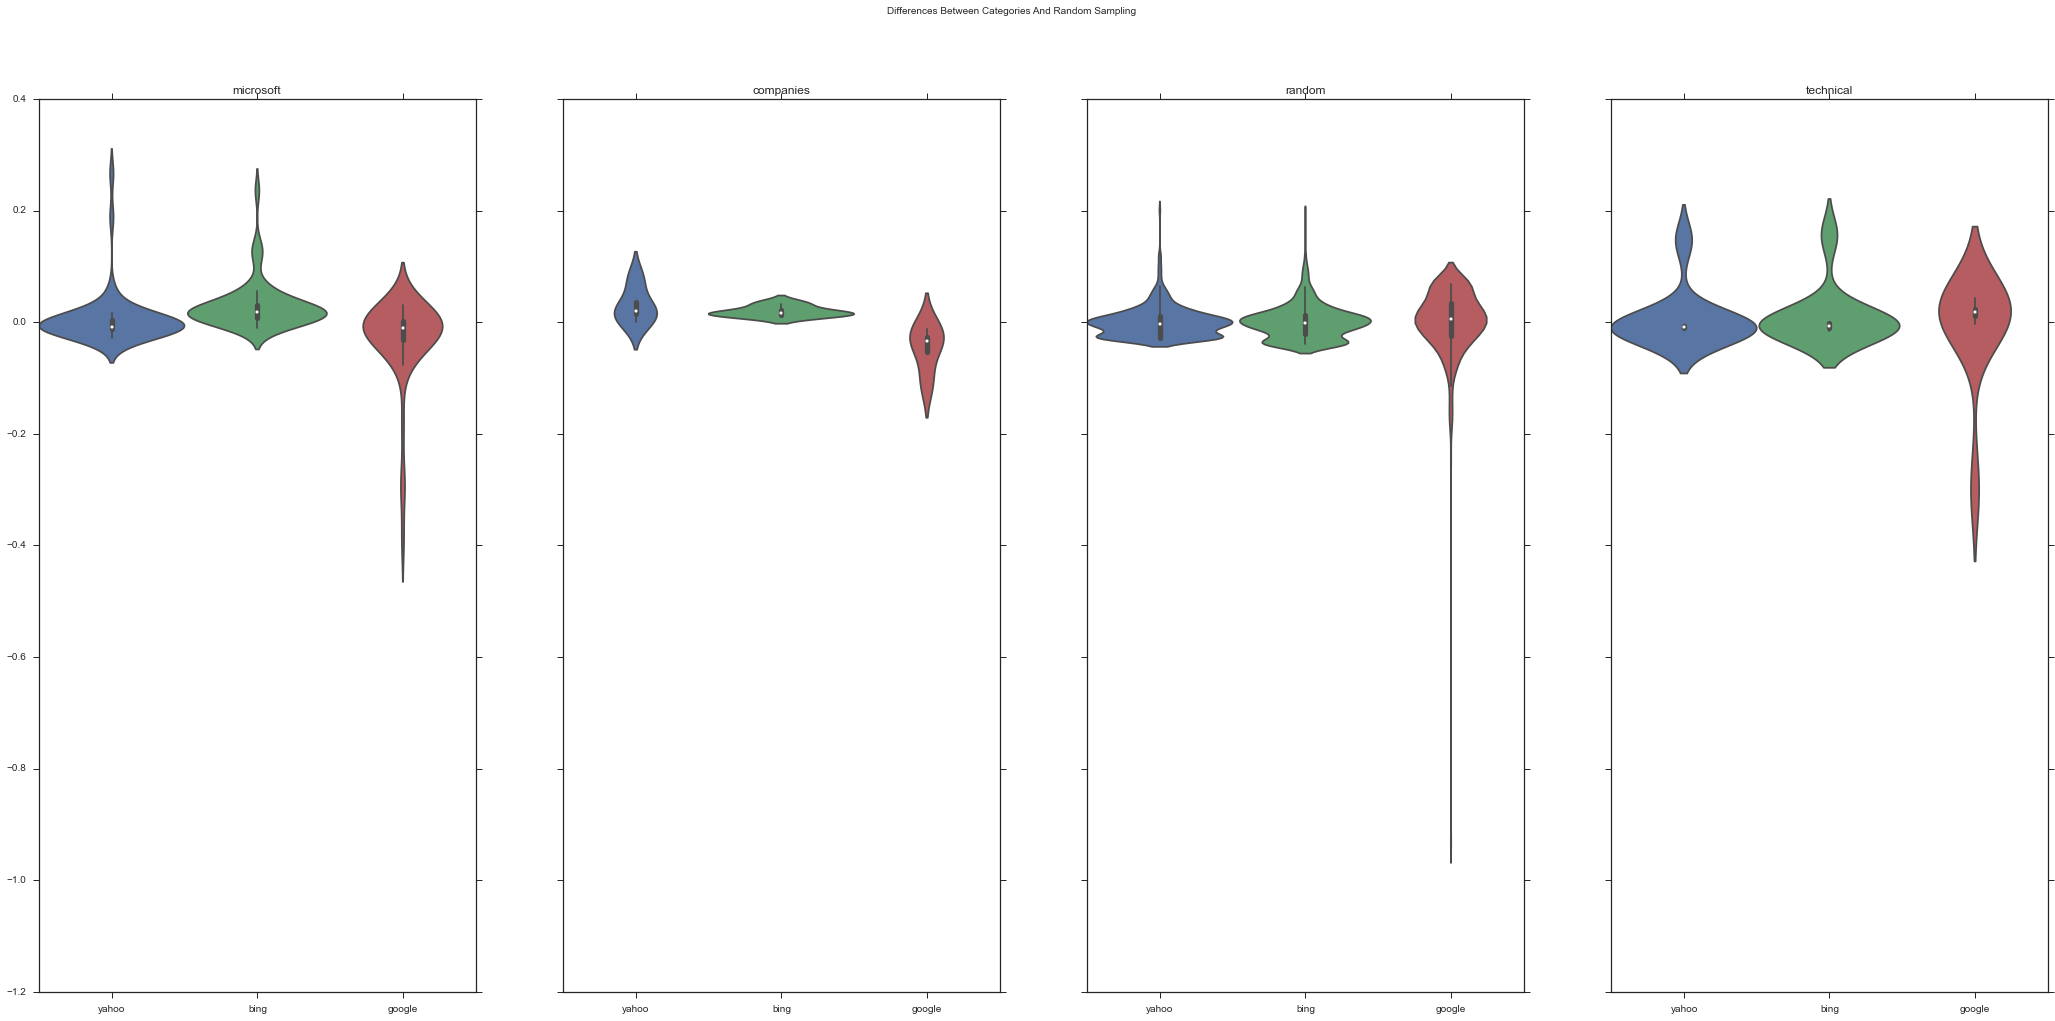

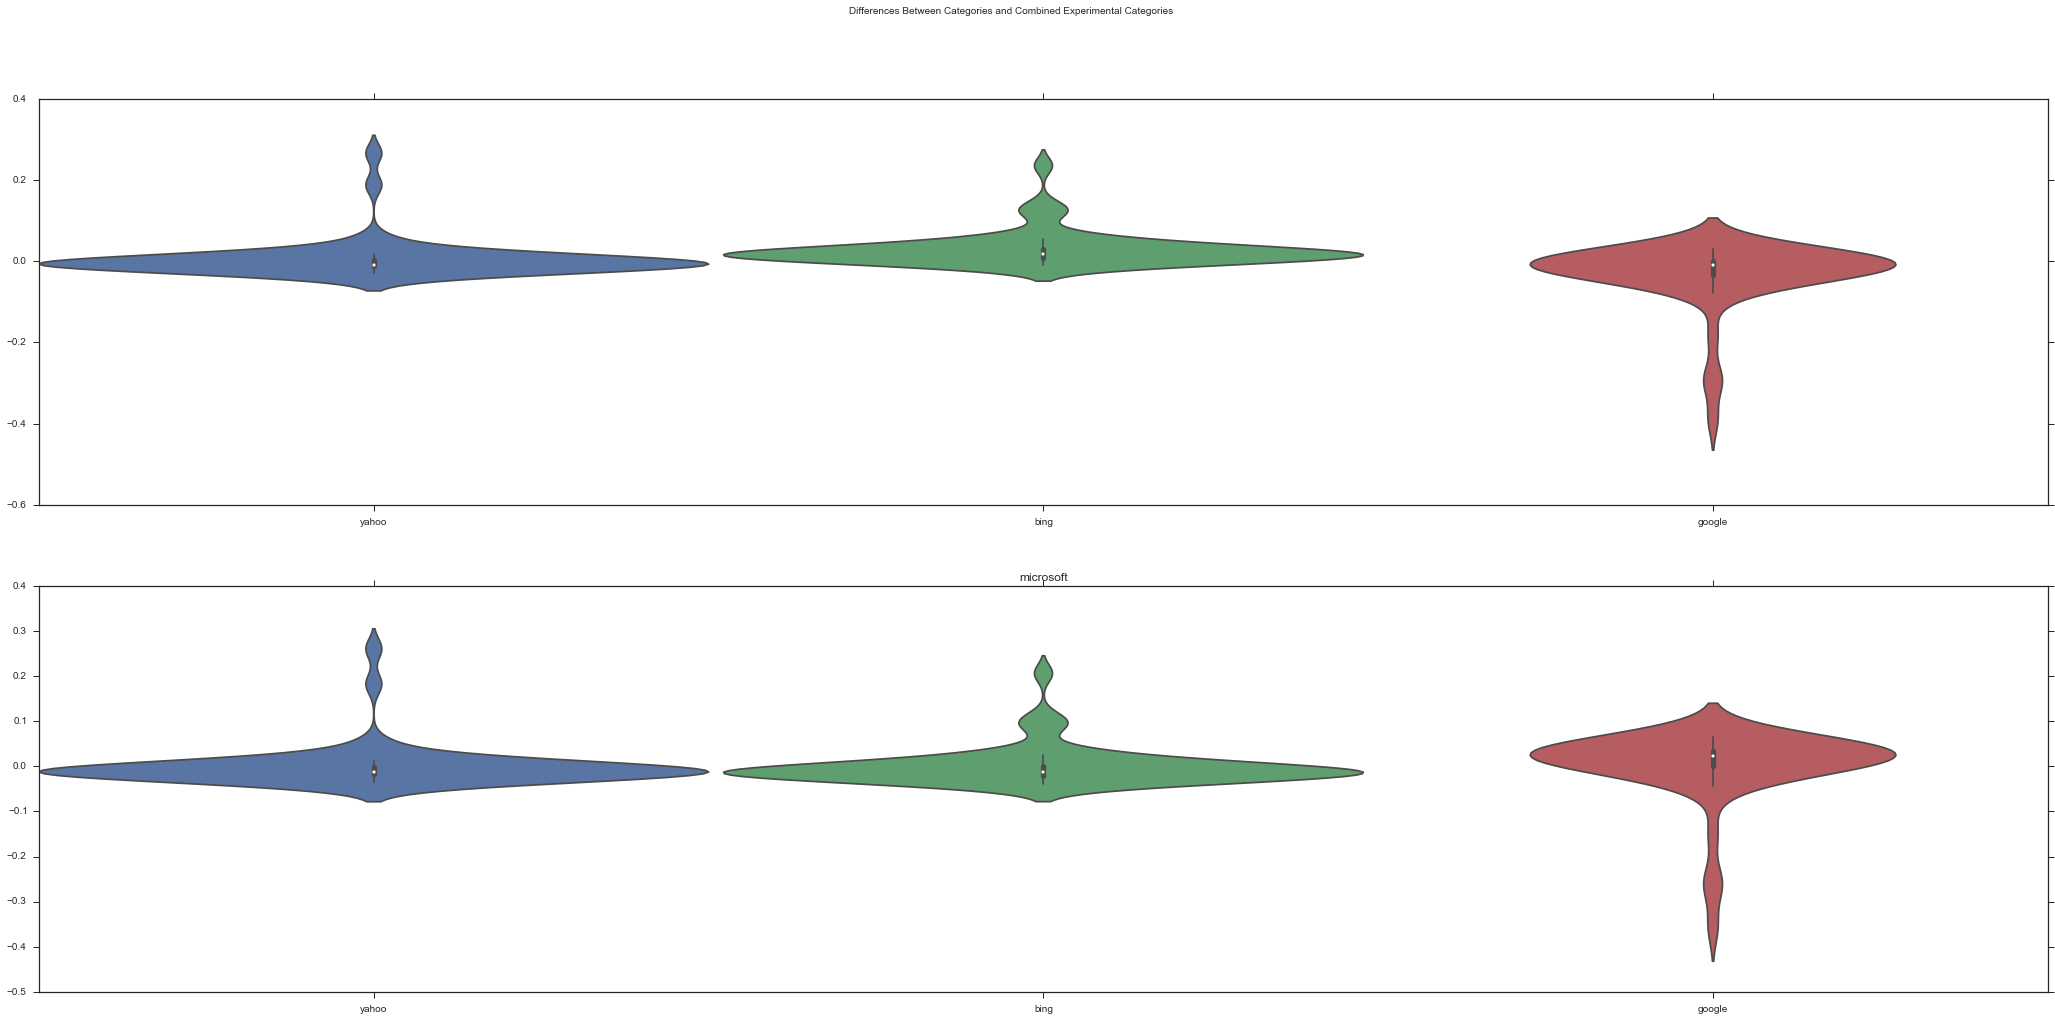

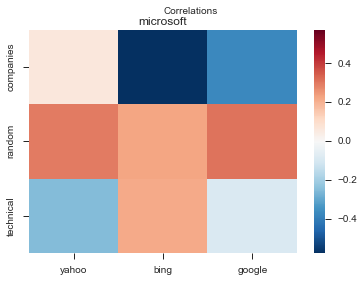

In [3]:
ms_problem.discovery()

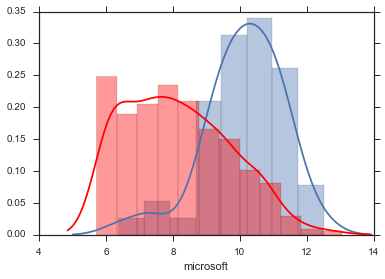

In [4]:
ms_problem.popularityOf()

Evidently, the hypothesis is correct. People there is a bing-favoring-bias in pages related to microsoft products.

# Clickbait Problem

People coined the word 'clickbait' to talk about web pages that people visit because they have provocative titles. Here, we consider the categories 'sex', 'drugs', 'danger', and 'politics' as potentially clickbait. Let's look at what the numbers say.

In [5]:
import instances.clickbait
clickbait_problem = WikiProblem(instances.clickbait.inst, selection={'engines/links','twitter','facebook'})

Preparing problem instance.
heterosexuality does not exist
Sex_positions does not exist
Teabagging does not exist
cock does not exist
Mechanics_of_sex does not exist
Sexual_network does not exist
homosexuality does not exist
Clitorus does not exist
Blow_job does not exist
Terrorist_attack does not exist
AIDS does not exist
Anthrax#Pulmonary does not exist
Syphillis does not exist
Drowning#Capital_punishment does not exist
Anthrax#Gastrointestinal does not exist
Gonorrhea does not exist
CarcinomaHypertensive_heart_disease does not exist
Pro-life does not exist
Free_rider_problemPolice_brutality does not exist
Congressional_Hispanic_Conference does not exist
Federalism#United_States does not exist
Arab-Israeli_conflict does not exist
Gay_marriage does not exist
Pledge_Protection_Act does not exist
Conservatism_in_the_United_StatesNational_Association_for_the_Advancement_of_Colored_People does not exist
Legalization_of_drugs does not exist
Workers%27_compensation does not exist
Marriage_P

danger
       prop-twitter  prop-engines/links  engines/links  prop-facebook
count    111.000000                 111     111.000000     111.000000
mean       0.734112                   0       0.003392       0.130752
std        0.335005                   0       0.009343       0.173067
min        0.000000                   0       0.000000       0.000000
25%        0.651842                   0       0.001267       0.000000
50%        0.834483                   0       0.001839       0.000000
75%        1.000000                   0       0.002814       0.230769
max        1.000000                   0       0.094958       0.708861
The first item in these tuples represents the pearson correlation coefficient.

The second item in these tuples represents the p-value.

                                         prop-twitter prop-engines/links  \
random              (0.0682969986784, 0.476315917759)         (nan, 1.0)   
scientific-jargon  (-0.0914291587133, 0.541060132985)         (nan, 1.0)  

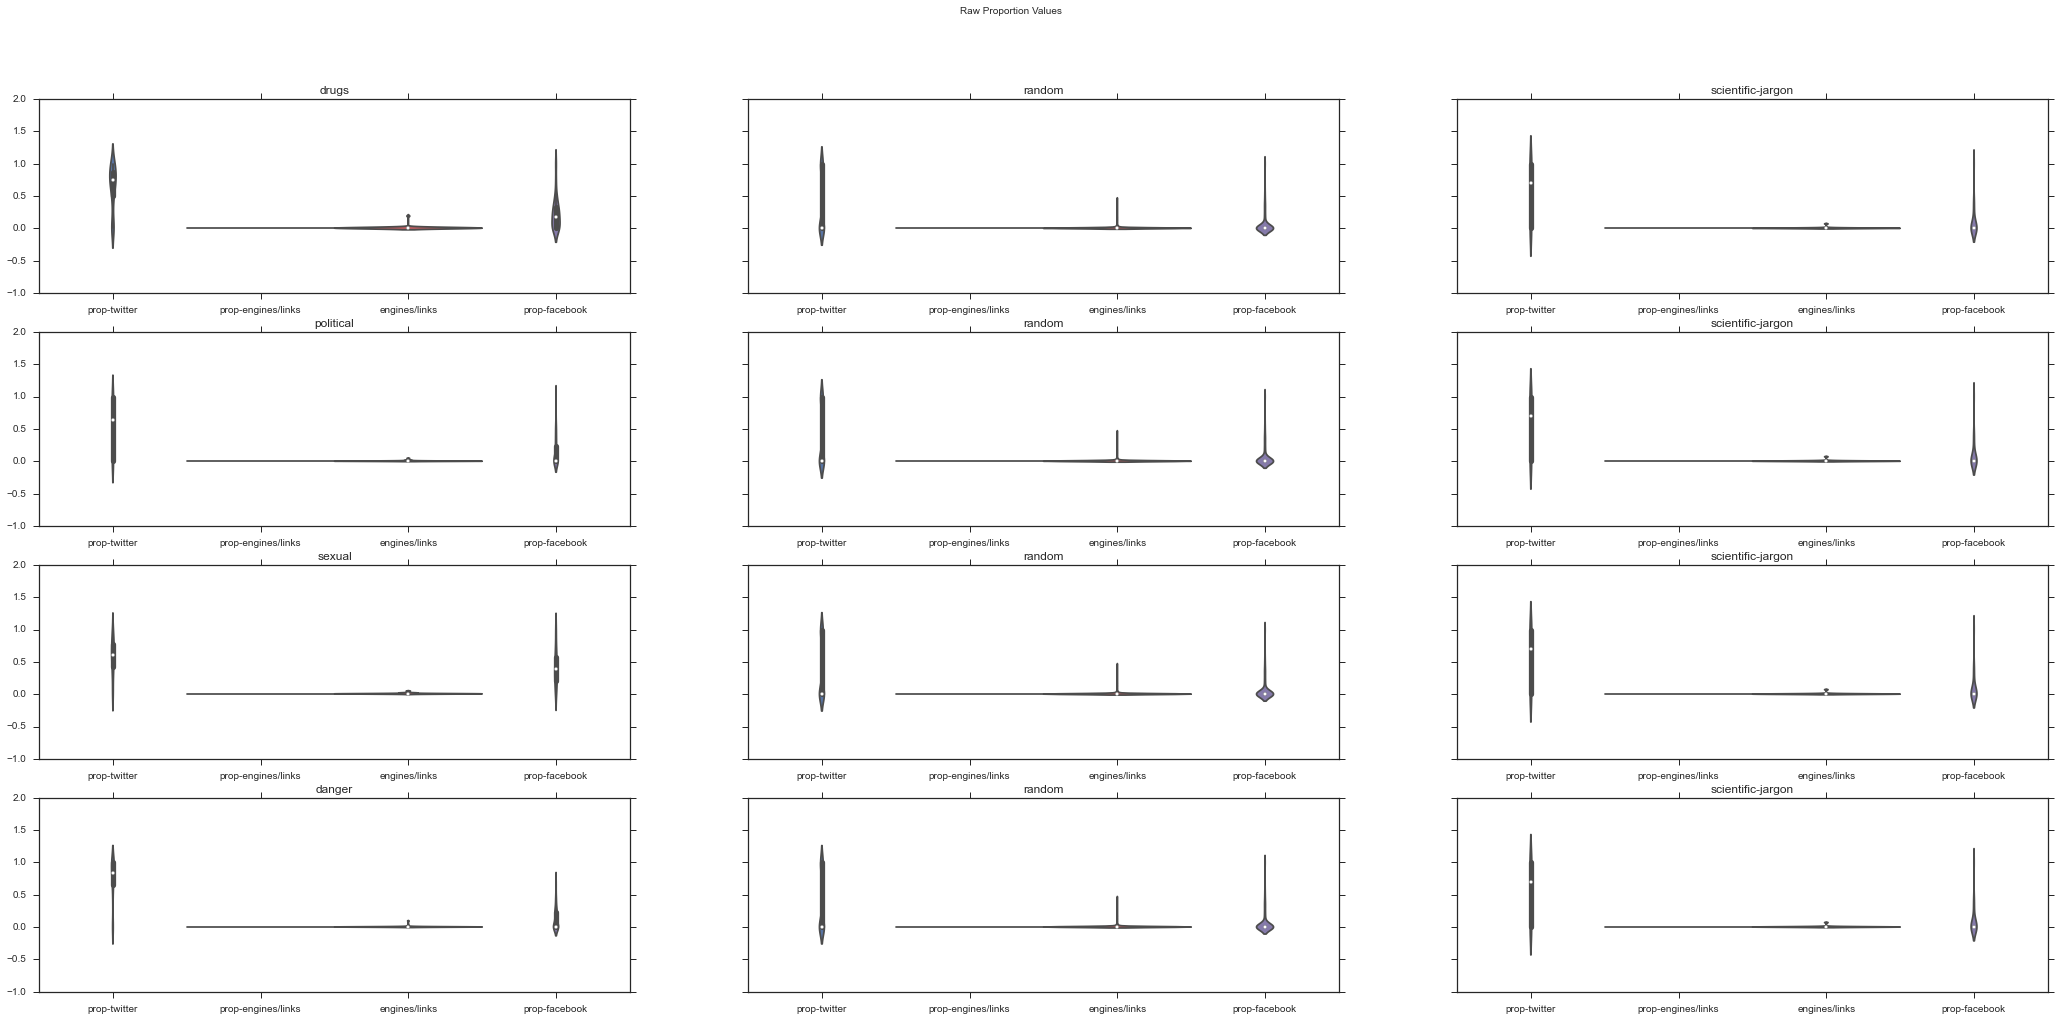

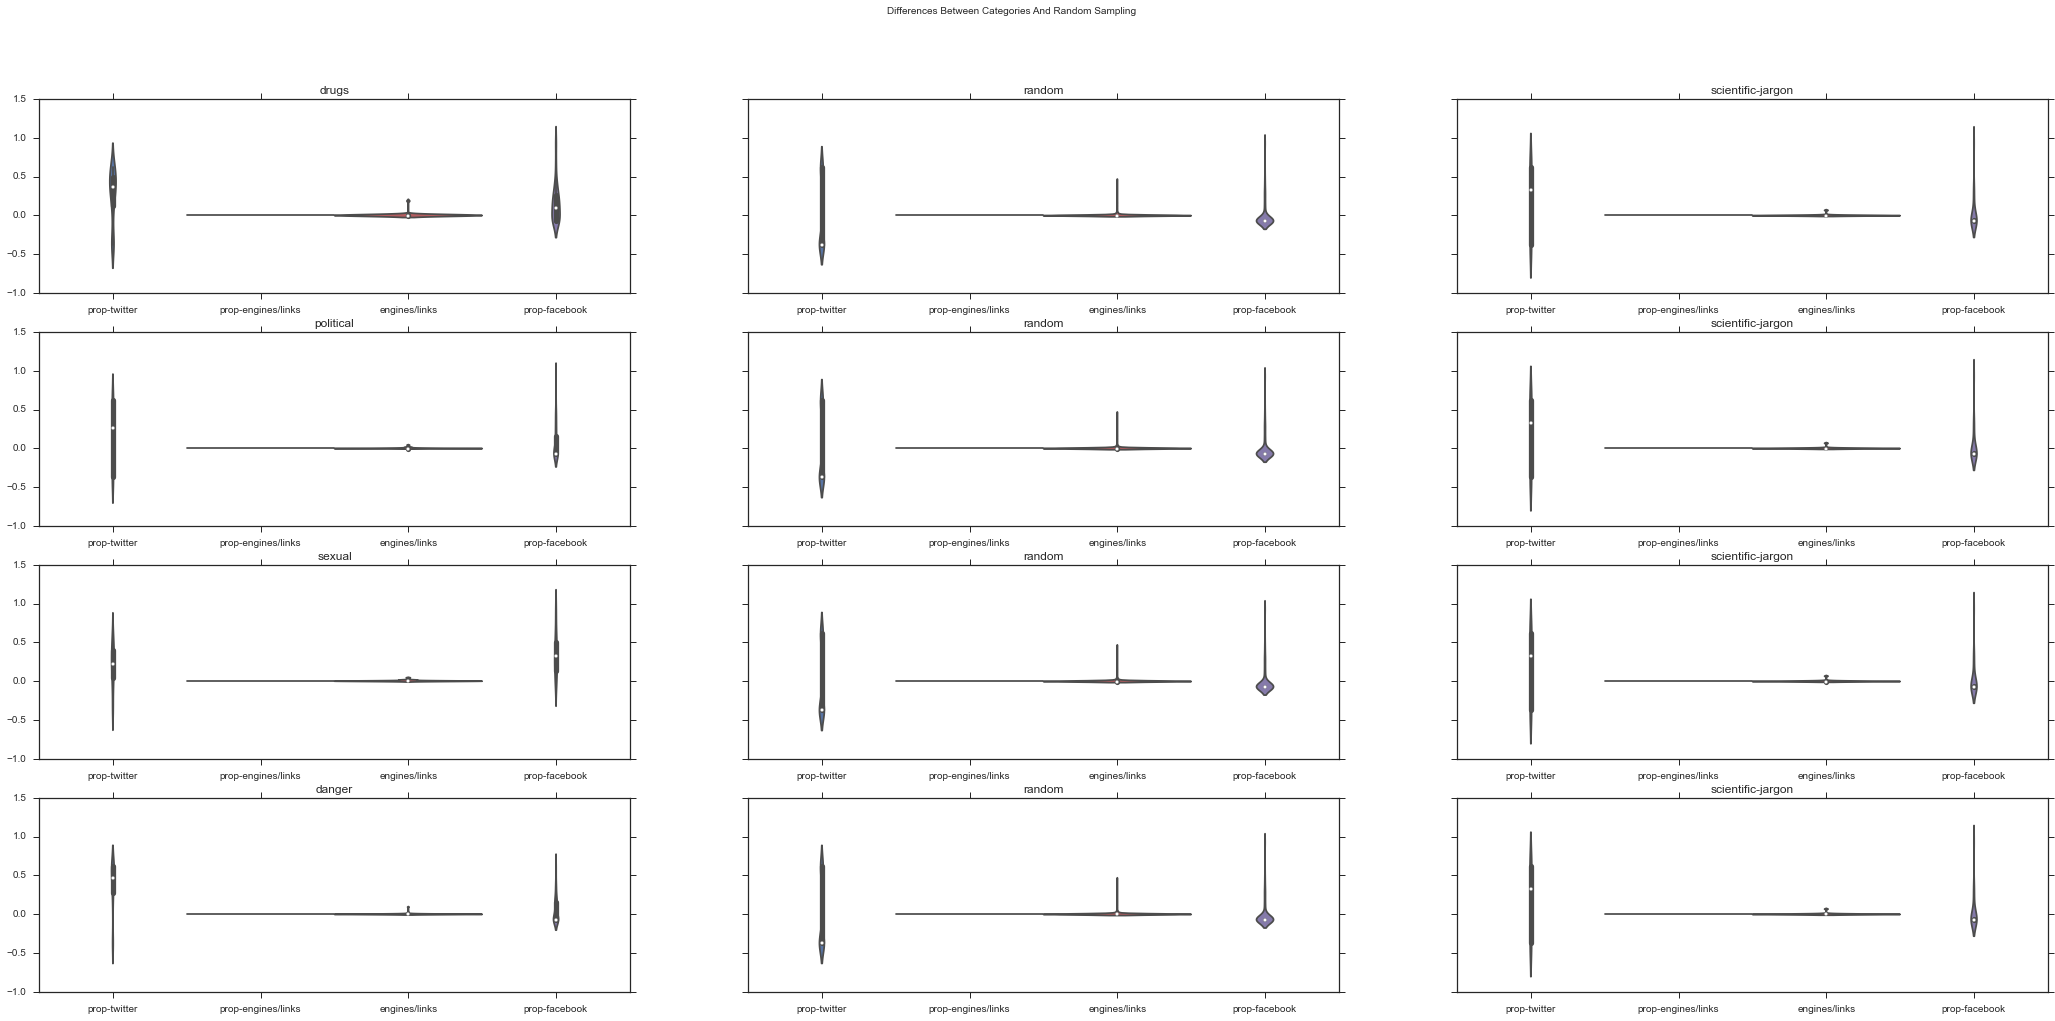

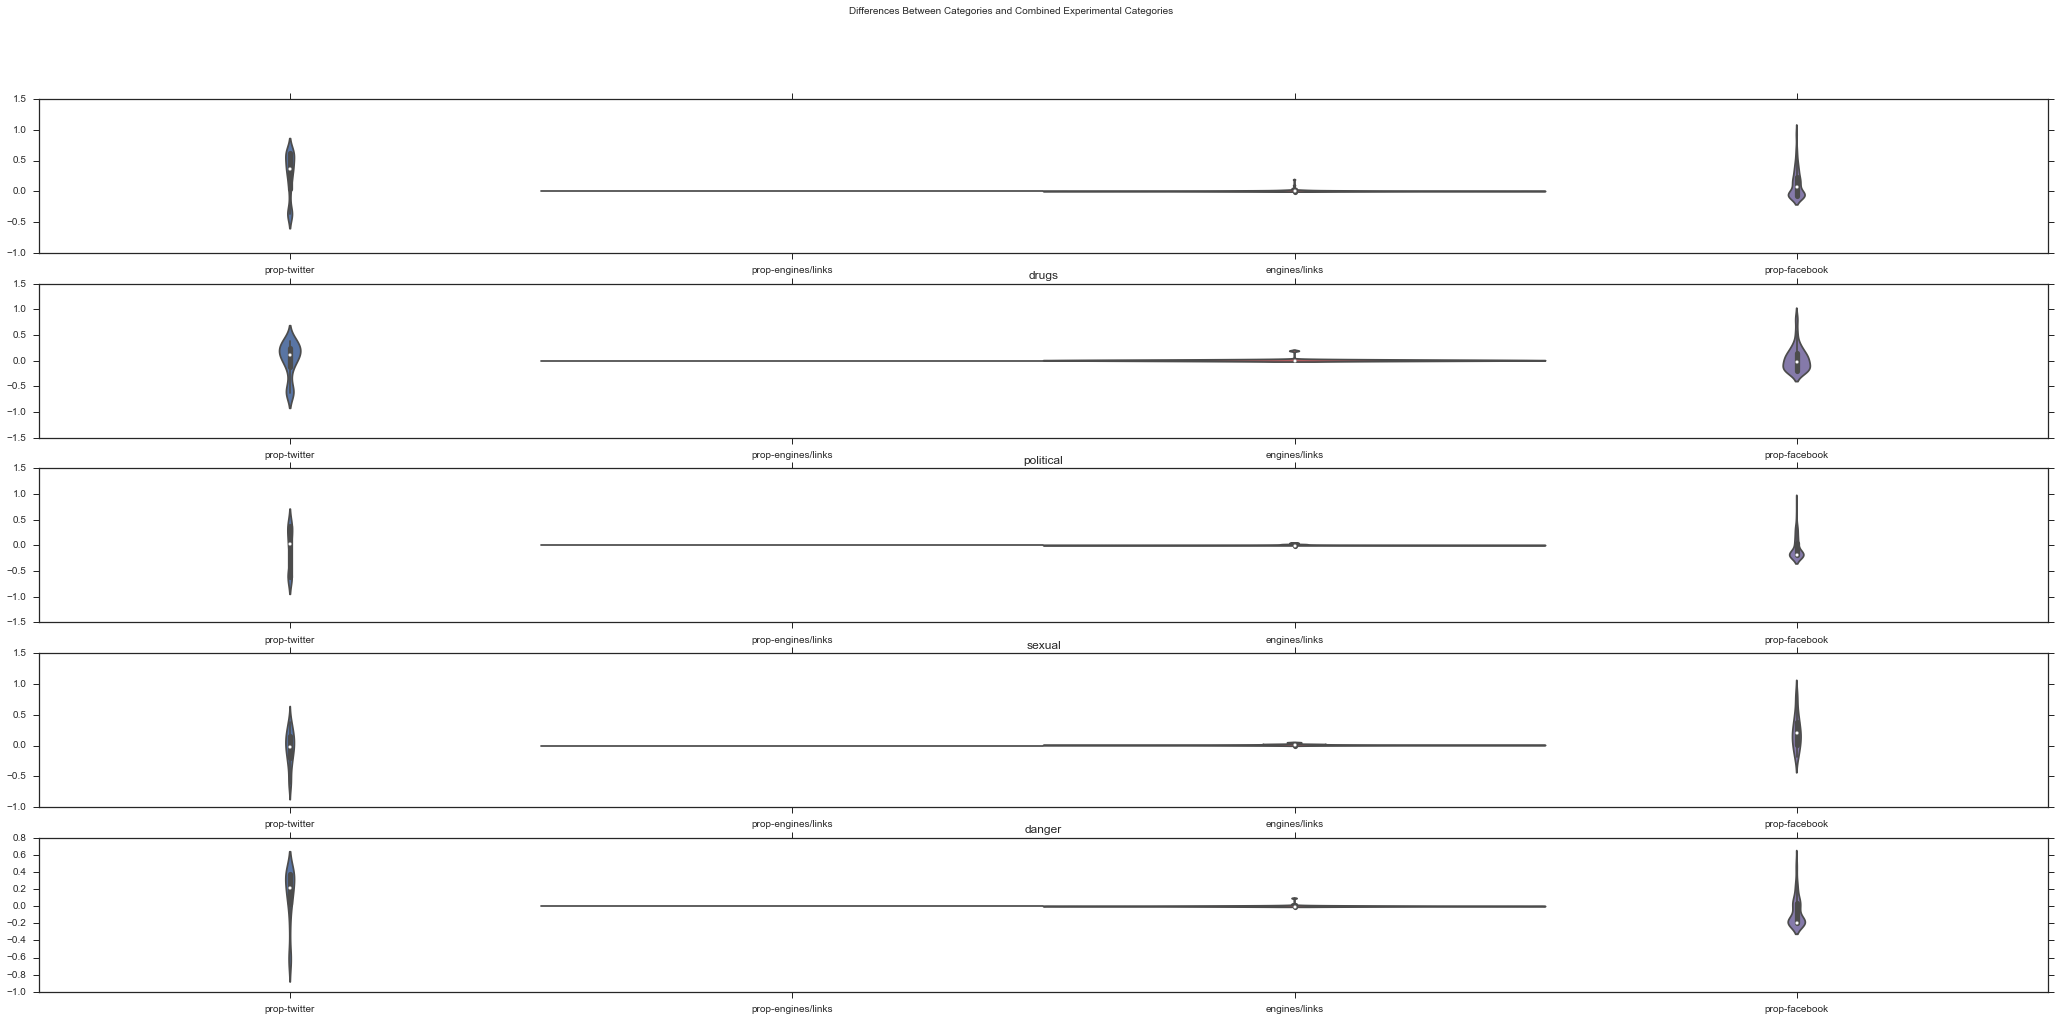

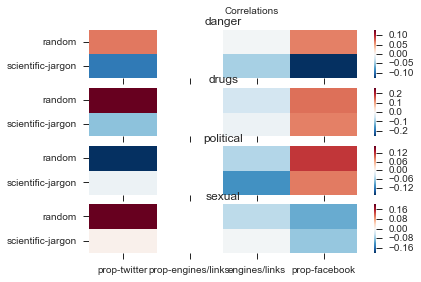

In [7]:
clickbait_problem.discovery()

From looking at these plots, it seems sex is clickbait. Drugs are not clickbait. Danger is not clickbait.

# Hierarchical Surfing

I sometimes find myself reading about a author or artist I'm interested in, and while I'm on that page I click on their discography or filmography or whatever out of curiosity. However, I don't remember ever searching for a list of things done by a person. I wonder whether other people have a similar usage pattern. Let's see what the numbers say.

In [8]:
import instances.hierarchical
hierarchical_problem = WikiProblem(instances.hierarchical.inst, selection={'engines/links'})

Preparing problem instance.
Robert_Downey,_Jr. does not exist
Richard_D_James does not exist
Richard_D_James_discography does not exist
Jack_Nicholson_filmographyStephen_King_bibliography does not exist
Filling tables with query results


person
       prop-engines/links  engines/links
count                  53             53
mean                    0              0
std                     0              0
min                     0              0
25%                     0              0
50%                     0              0
75%                     0              0
max                     0              0
The first item in these tuples represents the pearson correlation coefficient.

The second item in these tuples represents the p-value.

         prop-engines/links engines/links
*ography         (nan, 1.0)    (nan, 1.0)
random           (nan, 1.0)    (nan, 1.0)
Plotting density


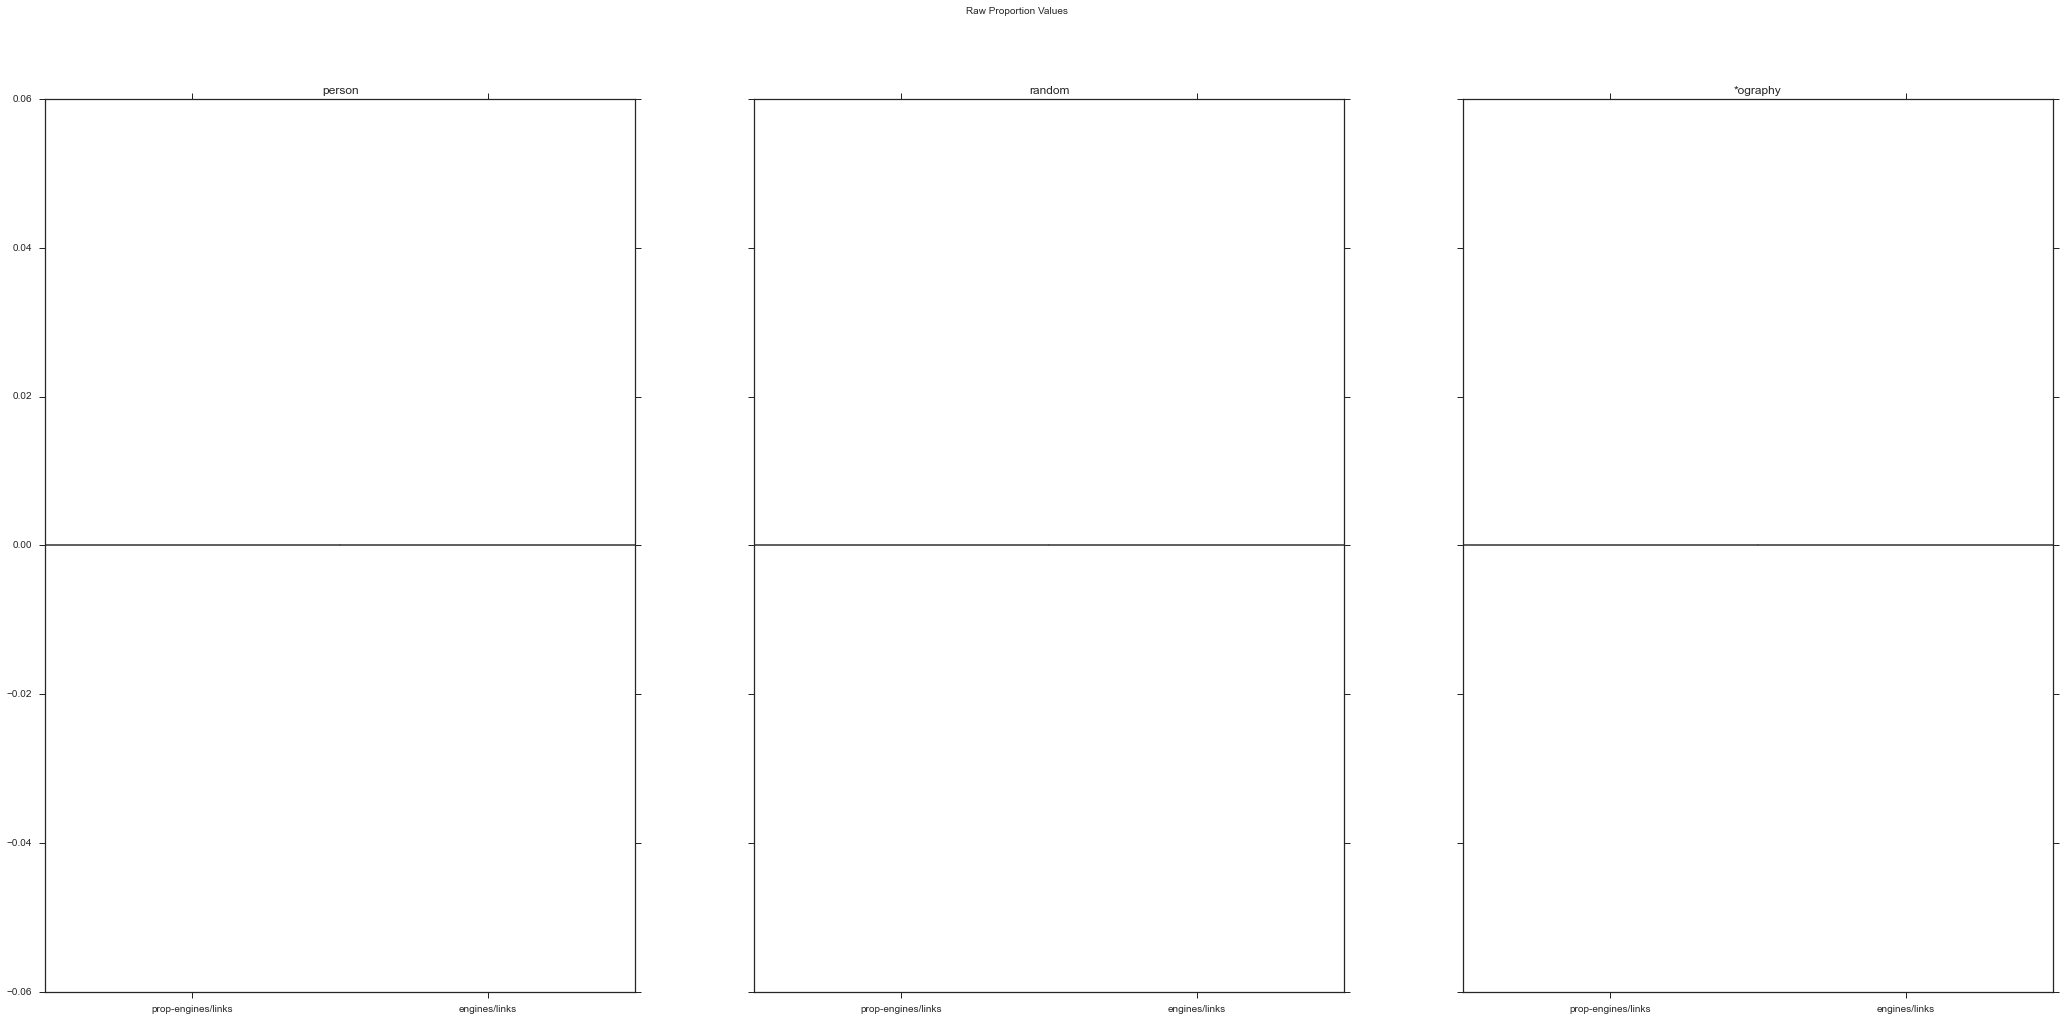

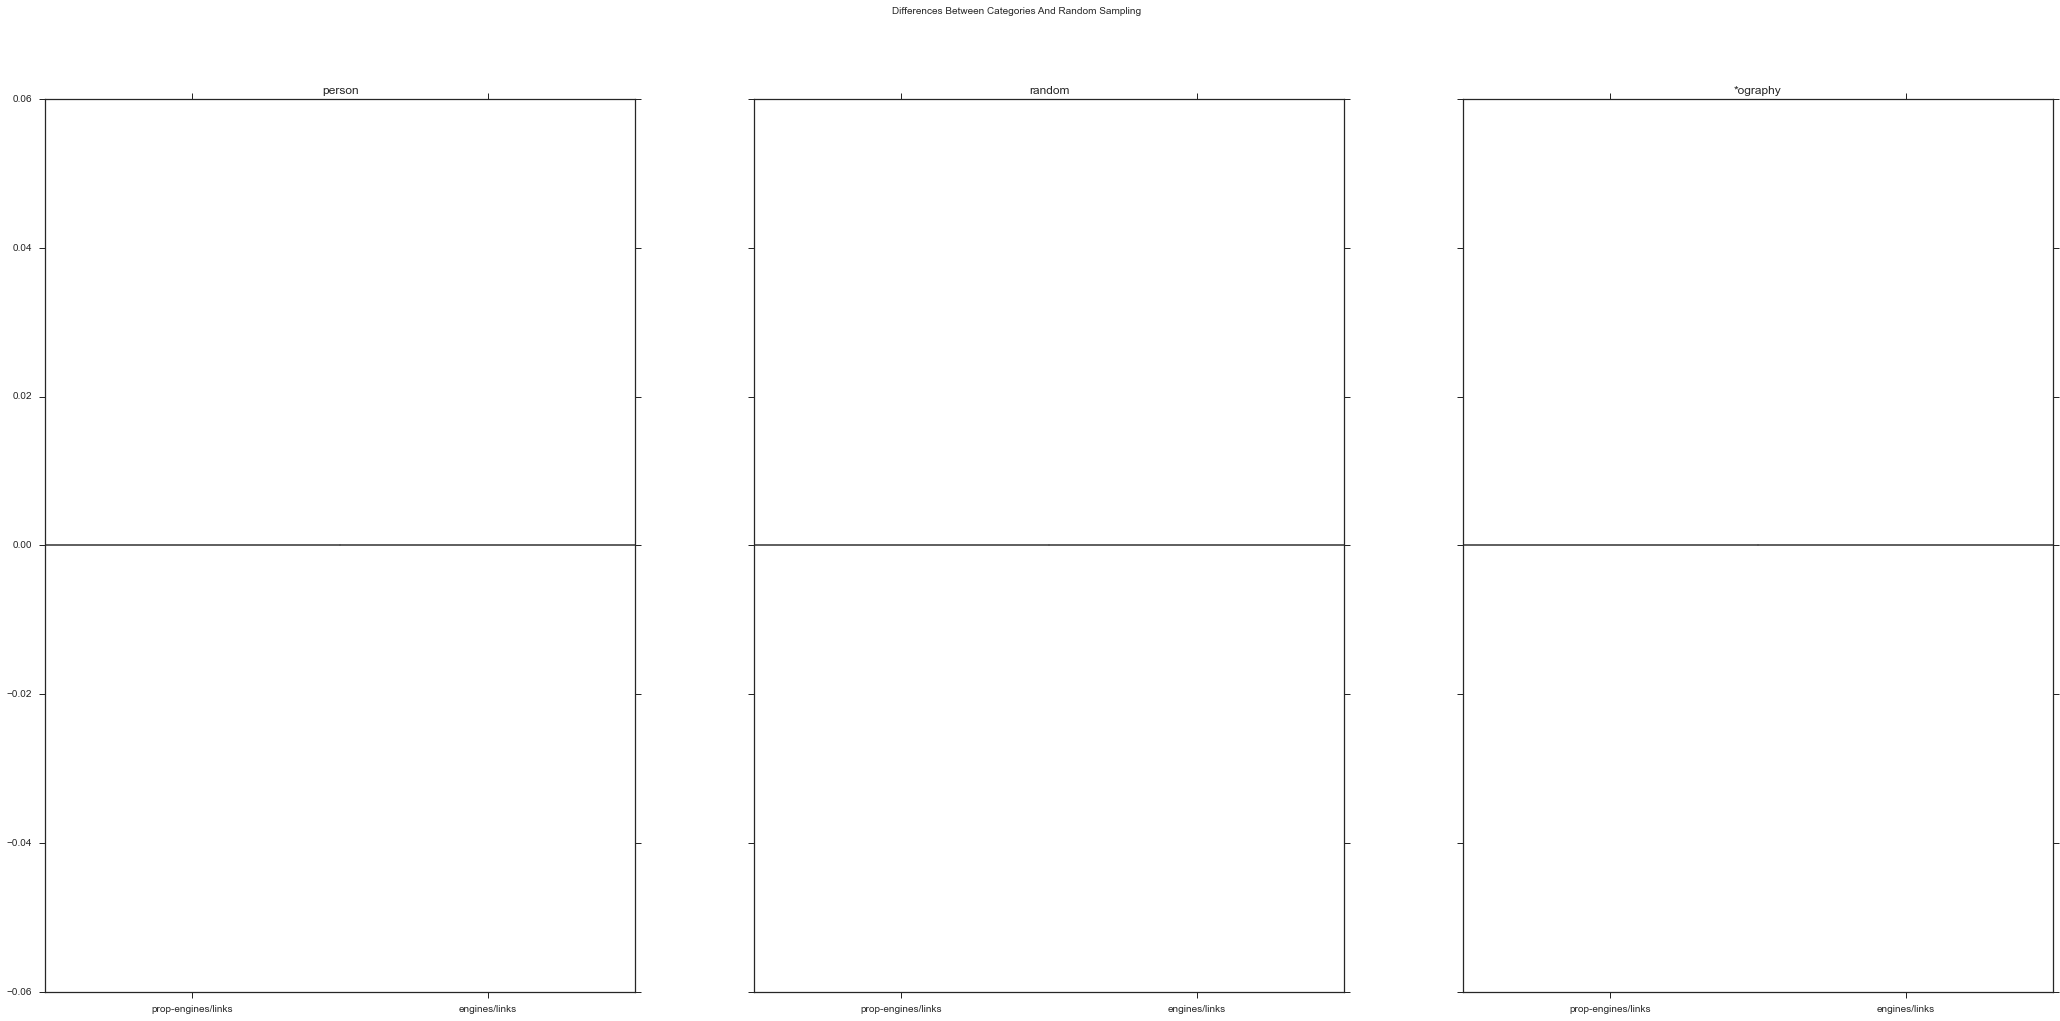

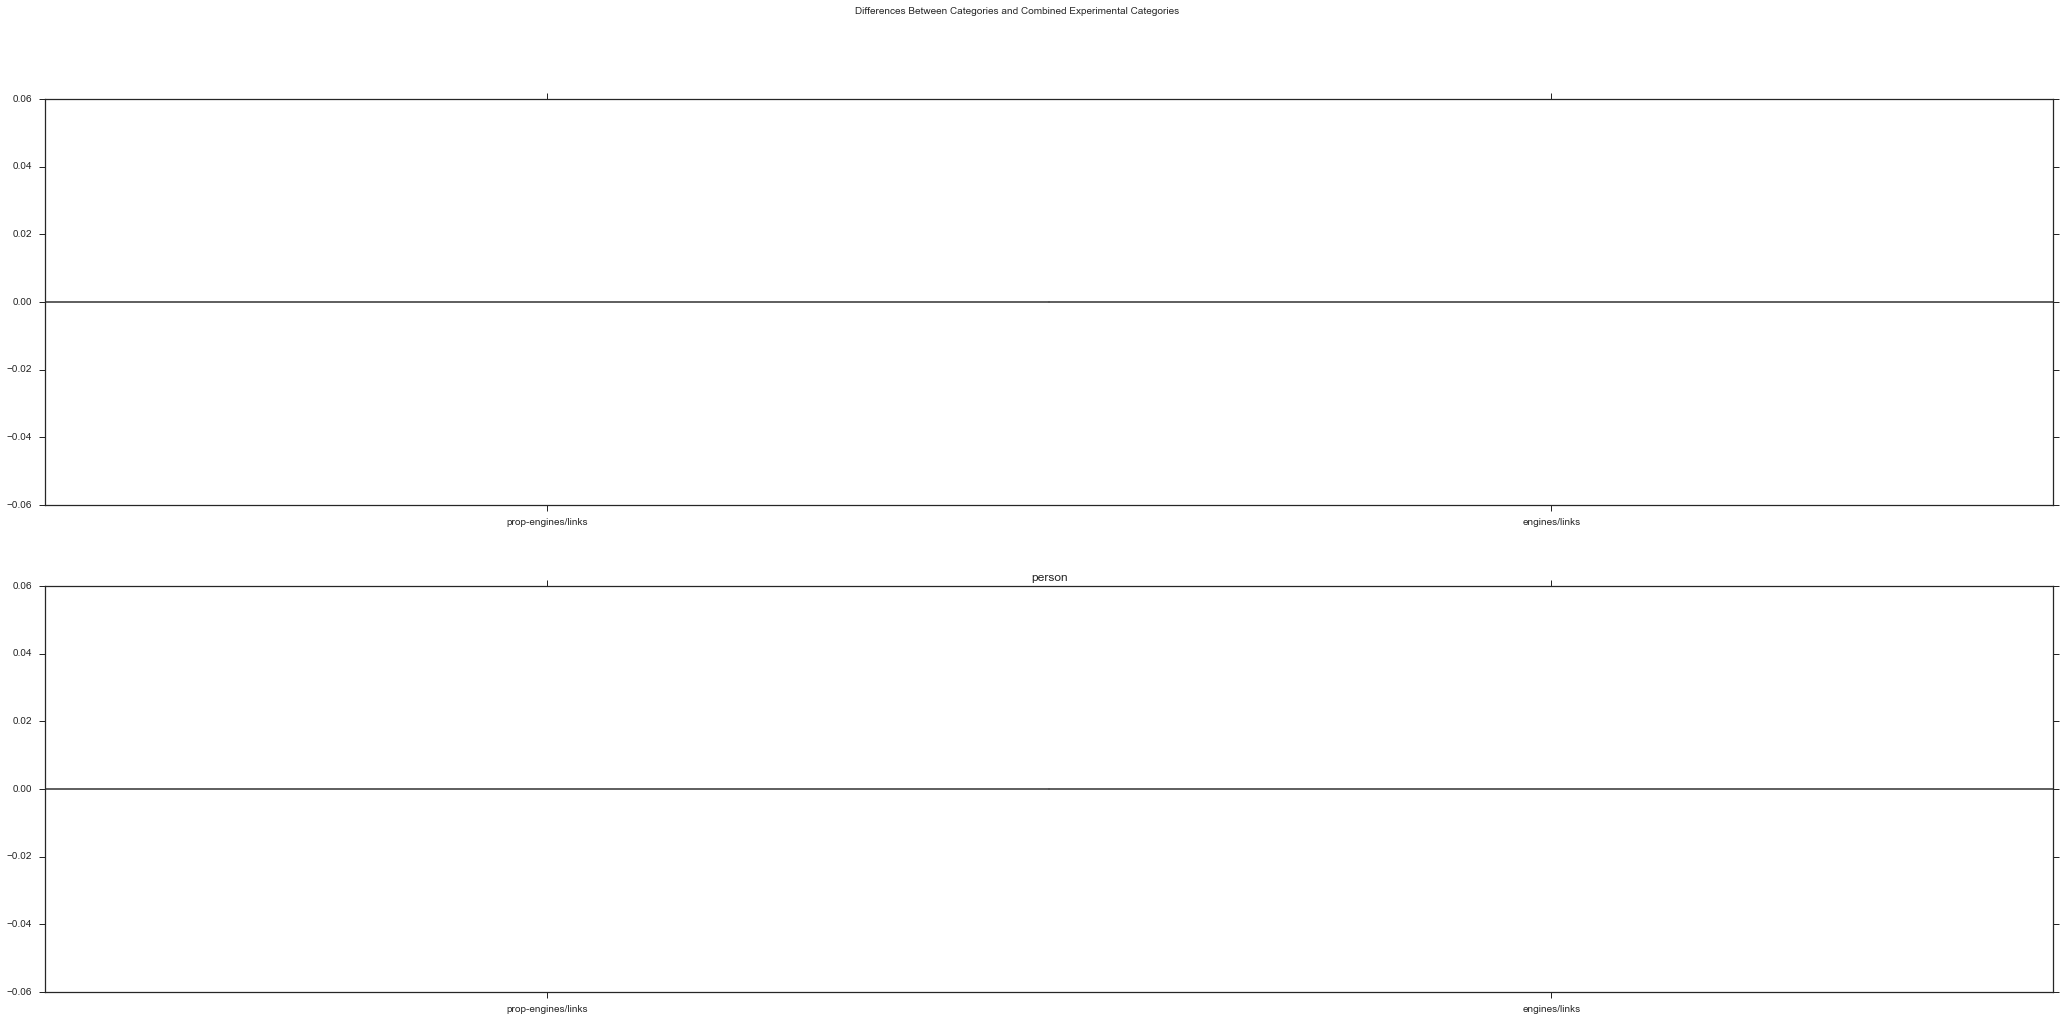

ValueError: zero-size array to reduction operation minimum which has no identity

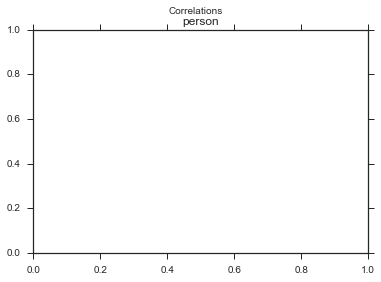

In [9]:
hierarchical_problem.discovery()

I seldom see people post links to wikipedia pages on facebook or twitter. Looking at what people share via social media, or more precisely what people click on via social media, is then more of an unsupervised clustering matter than a hypothesis testing matter.

The source of this data is the work of two people, partly myself and mostly my brother. He has this to say about his methods:

This means that a potentially confounding variable to the idea of inference of these categories compared to random is that these pages are pages a human thought of whereas the random pages were by definition not. What exactly a human, namely mark, thinks of may be influenced by hugely many factors, but the easiest one to test is that he thought of pages that were more popularly viewed than the average page. Let's examine that hypothesis.

# Parts of Speech

Another potential source of bias is in parts of speech. Because it is easy to make samples, here we go...

In [9]:
import instances.nountype
nountype_problem = WikiProblem(instances.nountype.inst)
#when 'selection' is not explicitly specified, all measurable properties are considered.

Preparing problem instance.
world series does not exist
Ideal_Home_Show does not exist
Men%27s_Fashion_Week does not exist
New_Year%27s_Eve does not exist
East_Coast_Surfing_Championships does not exist
French_revolution does not exist
Mercedes-Benz_Fashion_Week_Miami does not exist
alamo does not exist
International_Storytelling_Championship does not exist
stanley cup does not exist
StorySLAM does not exist
New_Year%27s_Day_Parade does not exist
Boston_Early_Music_Festival does not exist
National_Storytelling_Festival does not exist
Columbia Exhibit does not exist
Marvin_Misky does not exist
Hillary_Clinton does not exist
J.K_Rowling does not exist
Martin_Luther King does not exist
Muhammed_Ali does not exist
Gabriel_Garcia Marquez does not exist
Patti_Smith50_cent does not exist
Mao_ZeDong does not exist
Ben_Franklin does not exist
Roman_Pulaski does not exist
Jorge_Louis Borges does not exist
Alexander_The_Great. does not exist
Barak_Obama does not exist
Theramin does not exist
pate

concepts
       prop-wikipedia  prop-twitter  prop-bing  prop-google  prop-facebook  \
count       11.000000     11.000000  11.000000    11.000000      11.000000   
mean         0.051511      0.002596   0.042798     0.872494       0.000750   
std          0.030559      0.004261   0.019455     0.033904       0.001136   
min          0.018595      0.000000   0.009328     0.828423       0.000000   
25%          0.034013      0.000872   0.036465     0.853071       0.000000   
50%          0.039875      0.001274   0.040153     0.856343       0.000251   
75%          0.064947      0.002062   0.052467     0.887893       0.000991   
max          0.125466      0.015201   0.082185     0.949664       0.003734   

       engines/links  prop-yahoo  
count      11.000000   11.000000  
mean        0.721724    0.029851  
std         0.081933    0.012633  
min         0.562361    0.008862  
25%         0.672109    0.023540  
50%         0.695400    0.031795  
75%         0.794661    0.038958  
max     

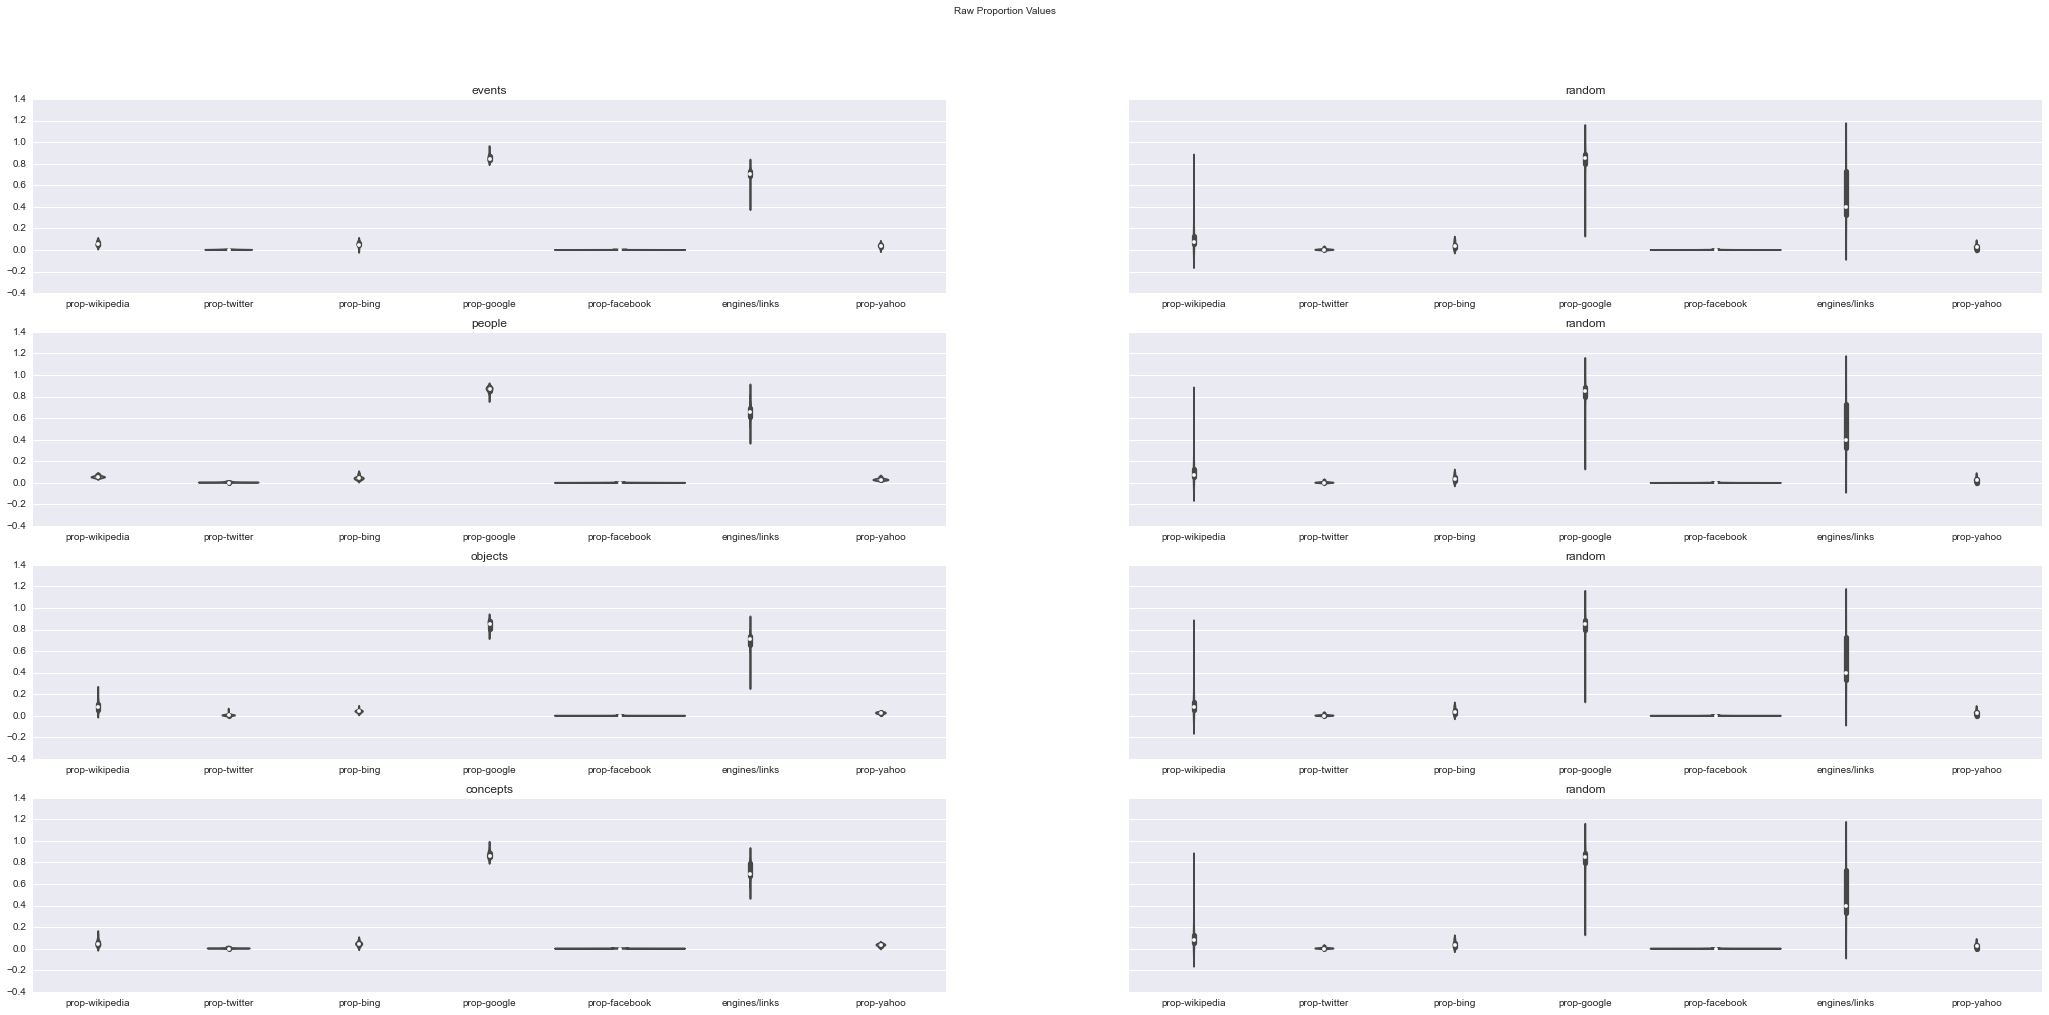

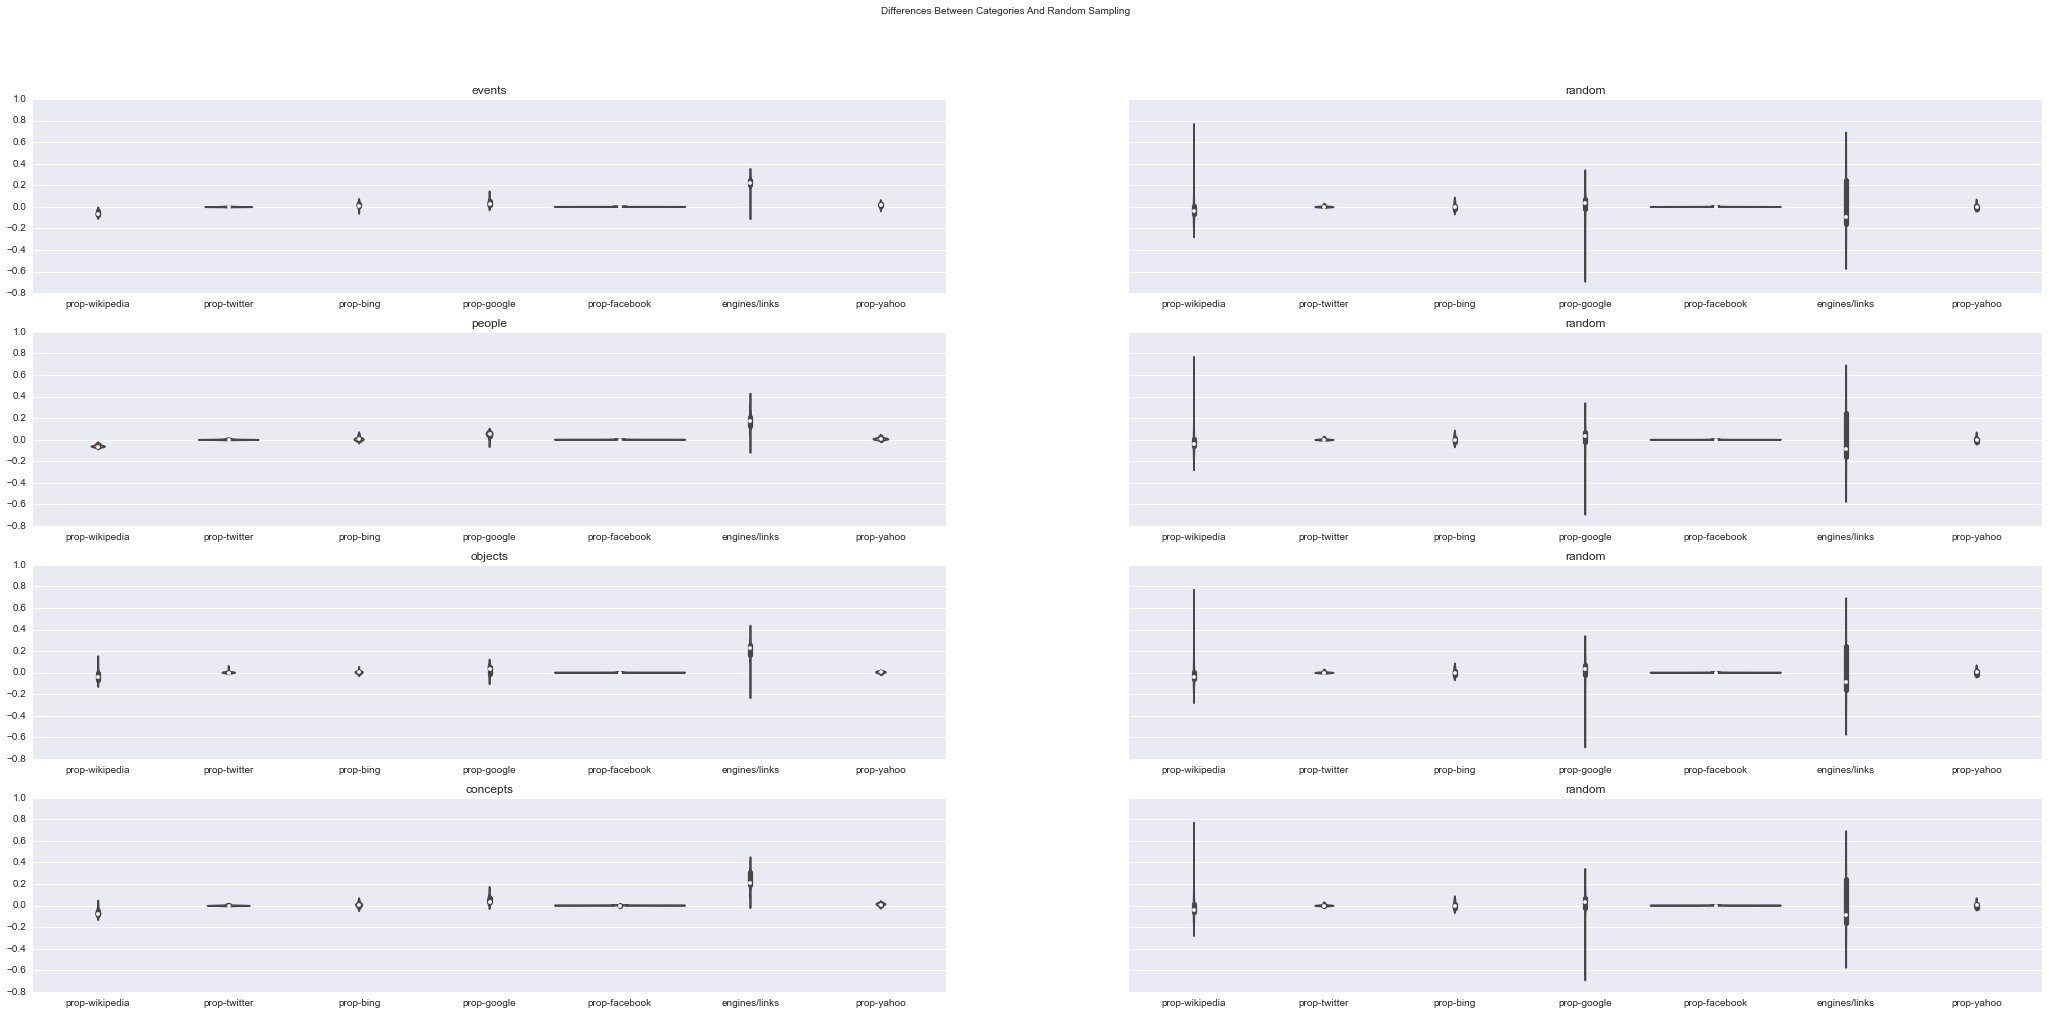

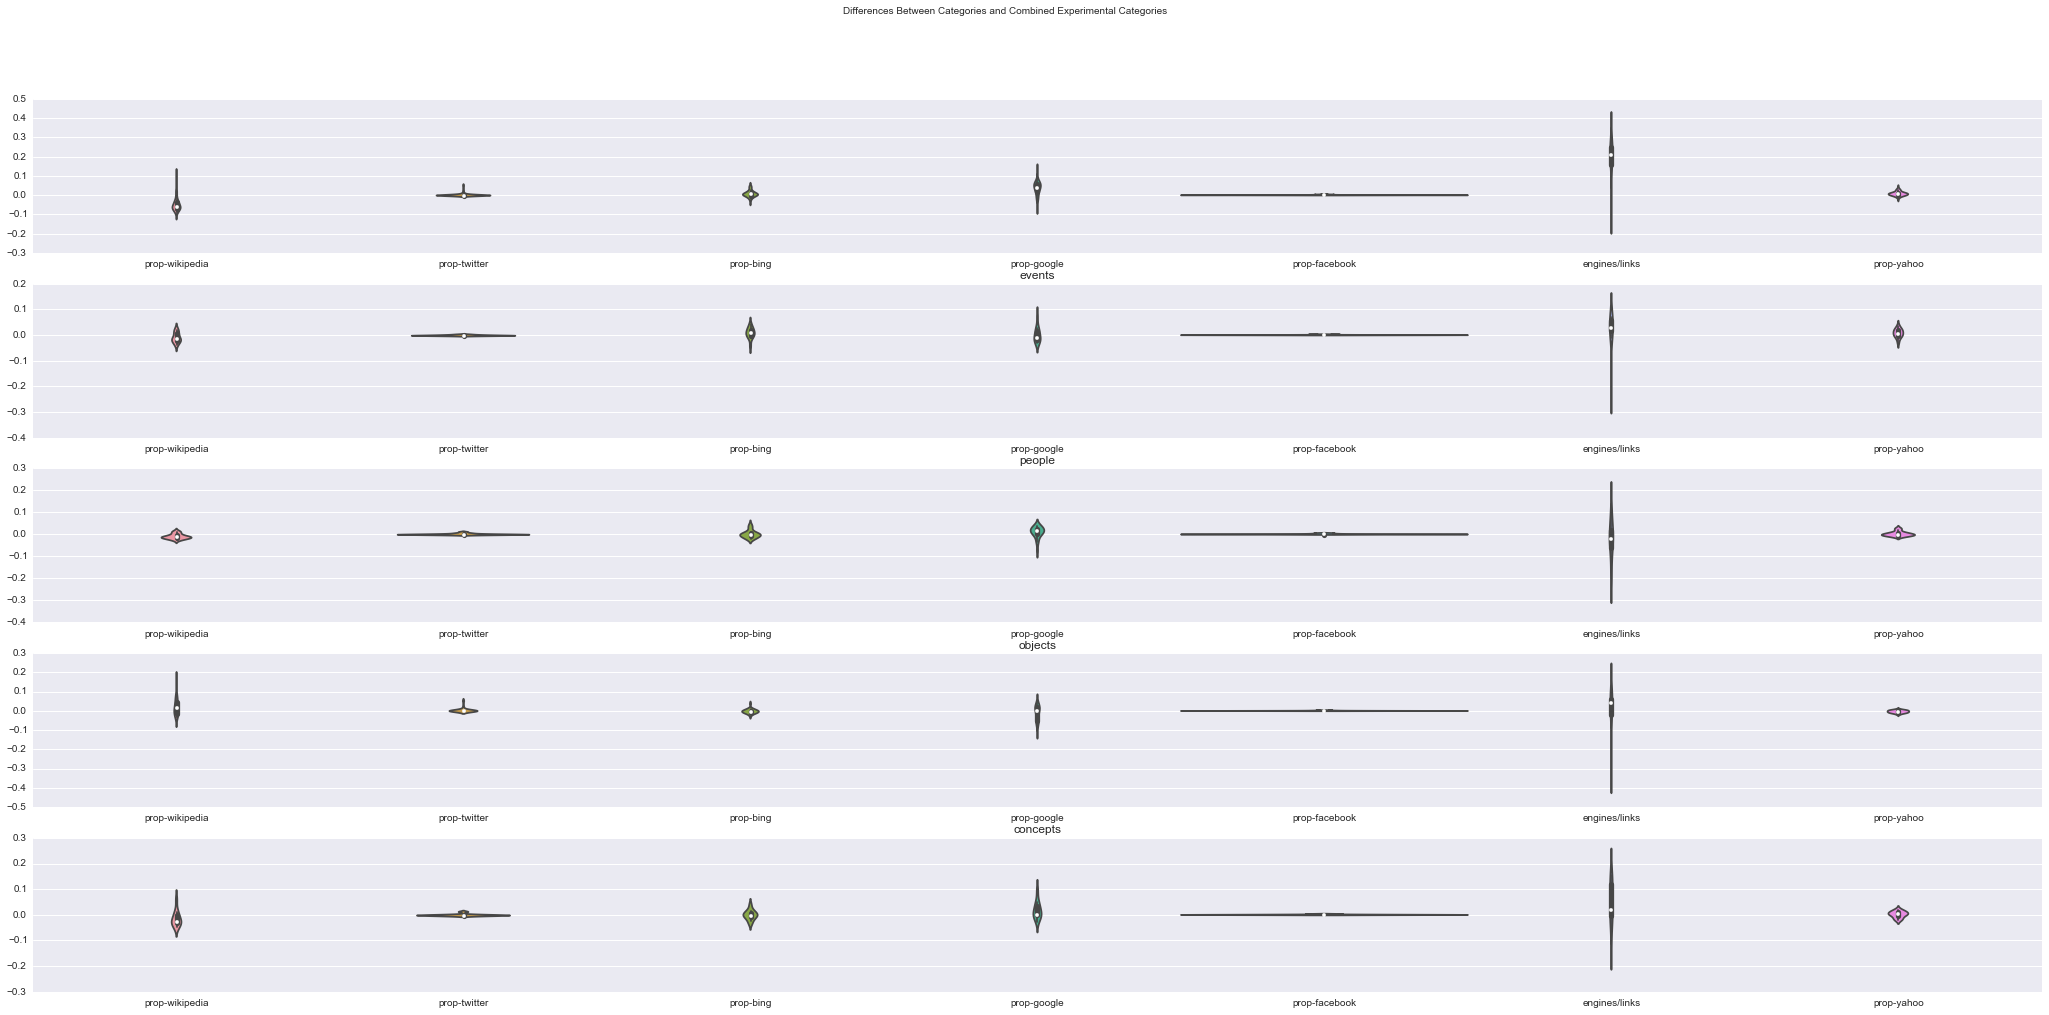

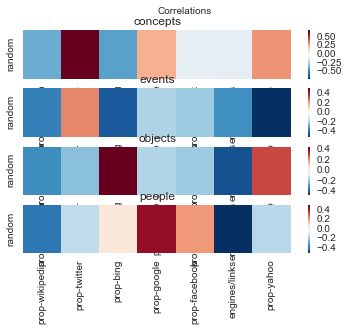

In [11]:
nountype_problem.discovery()

Another source of bias is the possibility that the sampling of non-random categories is skewed towards the high-view pages, and it is possible that that bias weakens the suggestion that the previous findings are related to their hypothesis.

In [3]:
ms_problem.popularityOf()
nountype_problem.popularityOf()
clickbait_problem.popularityOf()
hierarchical_problem.popularityOf()

NameError: name 'ms_problem' is not defined

In [2]:
import instances.popularity
popularity_q_problem = WikiProblem(instances.popularity.quantile_inst)
popularity_even_problem =  WikiProblem(instances.popularity.even_inst)

Preparing problem instance.
Filling tables with query results
Preparing problem instance.
Filling tables with query results


.2 quantile
       prop-google  prop-wikipedia  prop-twitter  prop-facebook  prop-bing  \
count     9.000000        9.000000      9.000000       9.000000   9.000000   
mean      0.820741        0.100329      0.005236       0.000405   0.038911   
std       0.068420        0.061183      0.006243       0.000896   0.022277   
min       0.688304        0.021687      0.000000       0.000000   0.000000   
25%       0.794821        0.066587      0.000000       0.000000   0.033680   
50%       0.830281        0.089715      0.002442       0.000000   0.036231   
75%       0.861446        0.120829      0.009878       0.000000   0.063087   
max       0.910954        0.236987      0.016576       0.002617   0.064887   

       prop-yahoo  engines/links  
count    9.000000       9.000000  
mean     0.034378       0.375695  
std      0.020133       0.212057  
min      0.000000       0.152651  
25%      0.023889       0.253147  
50%      0.041029       0.368663  
75%      0.046435       0.397757  
max  

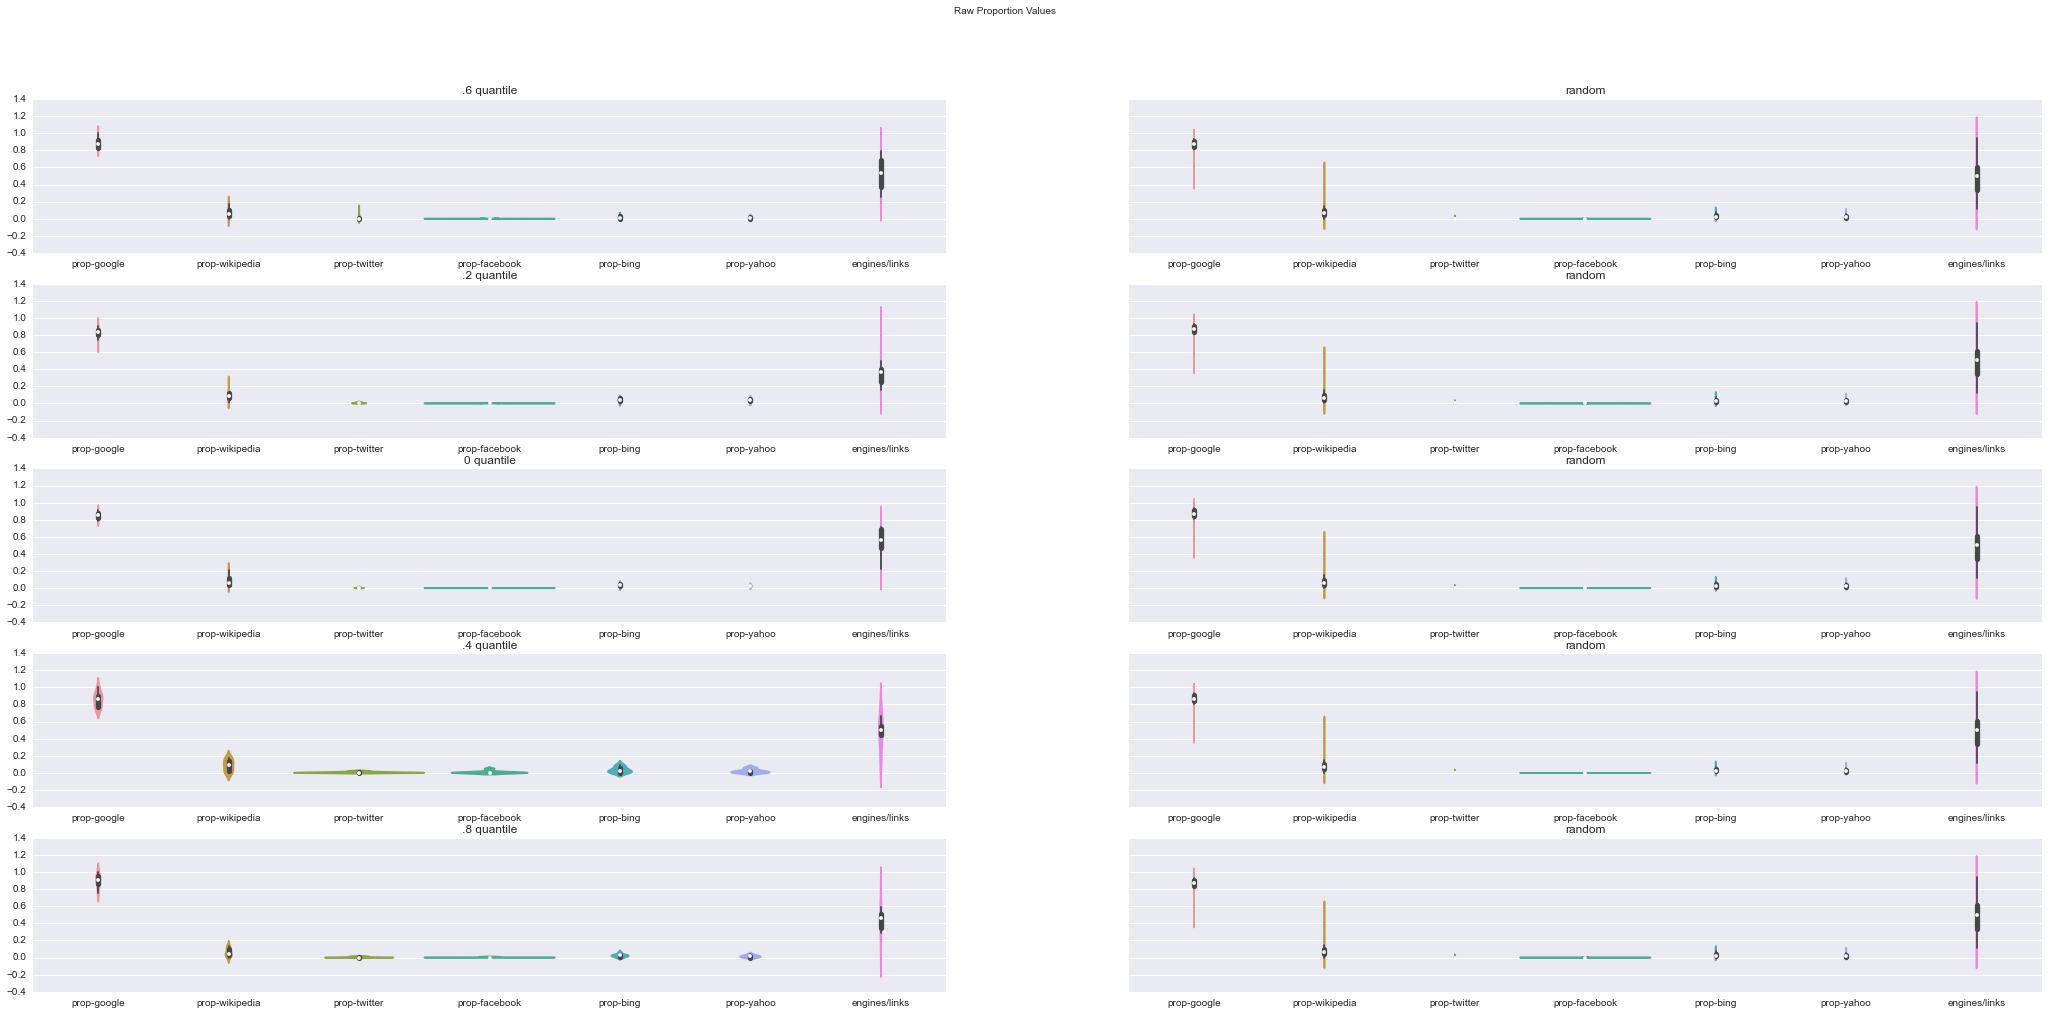

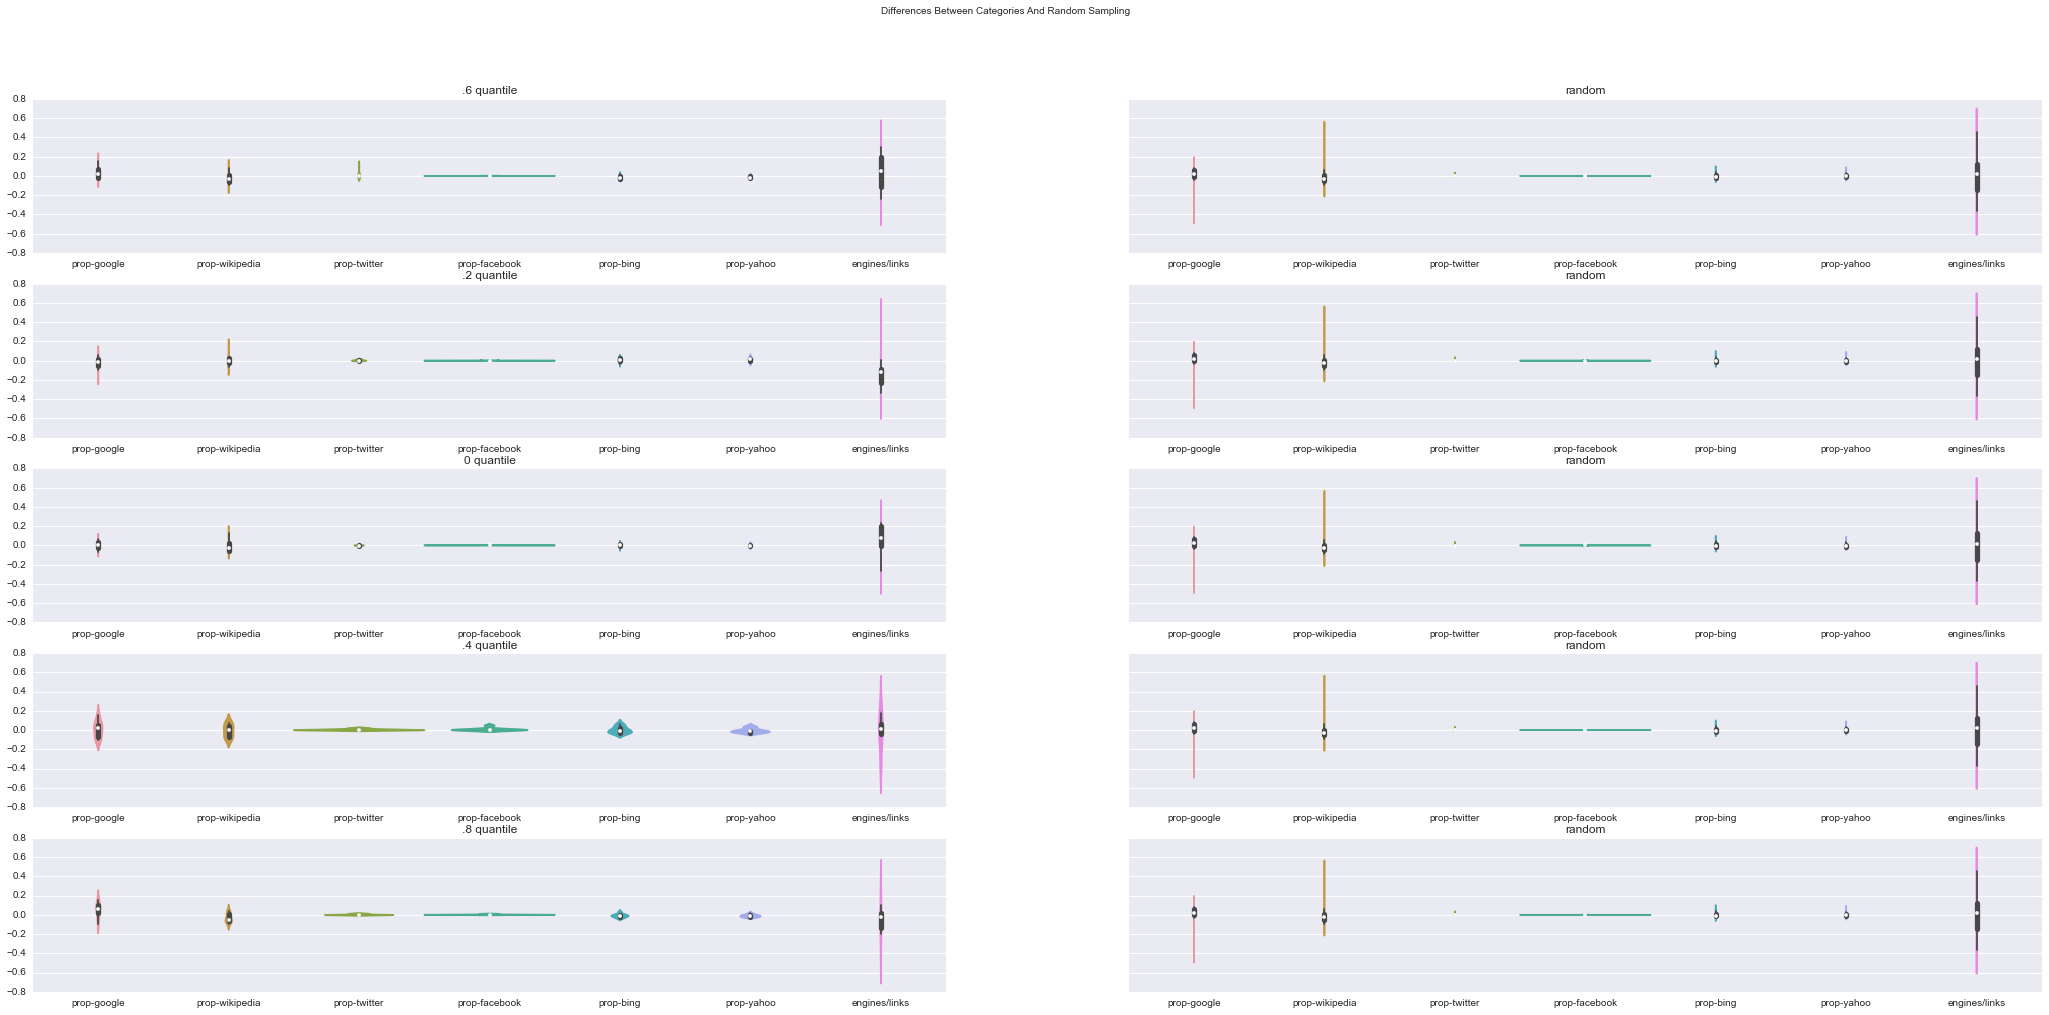

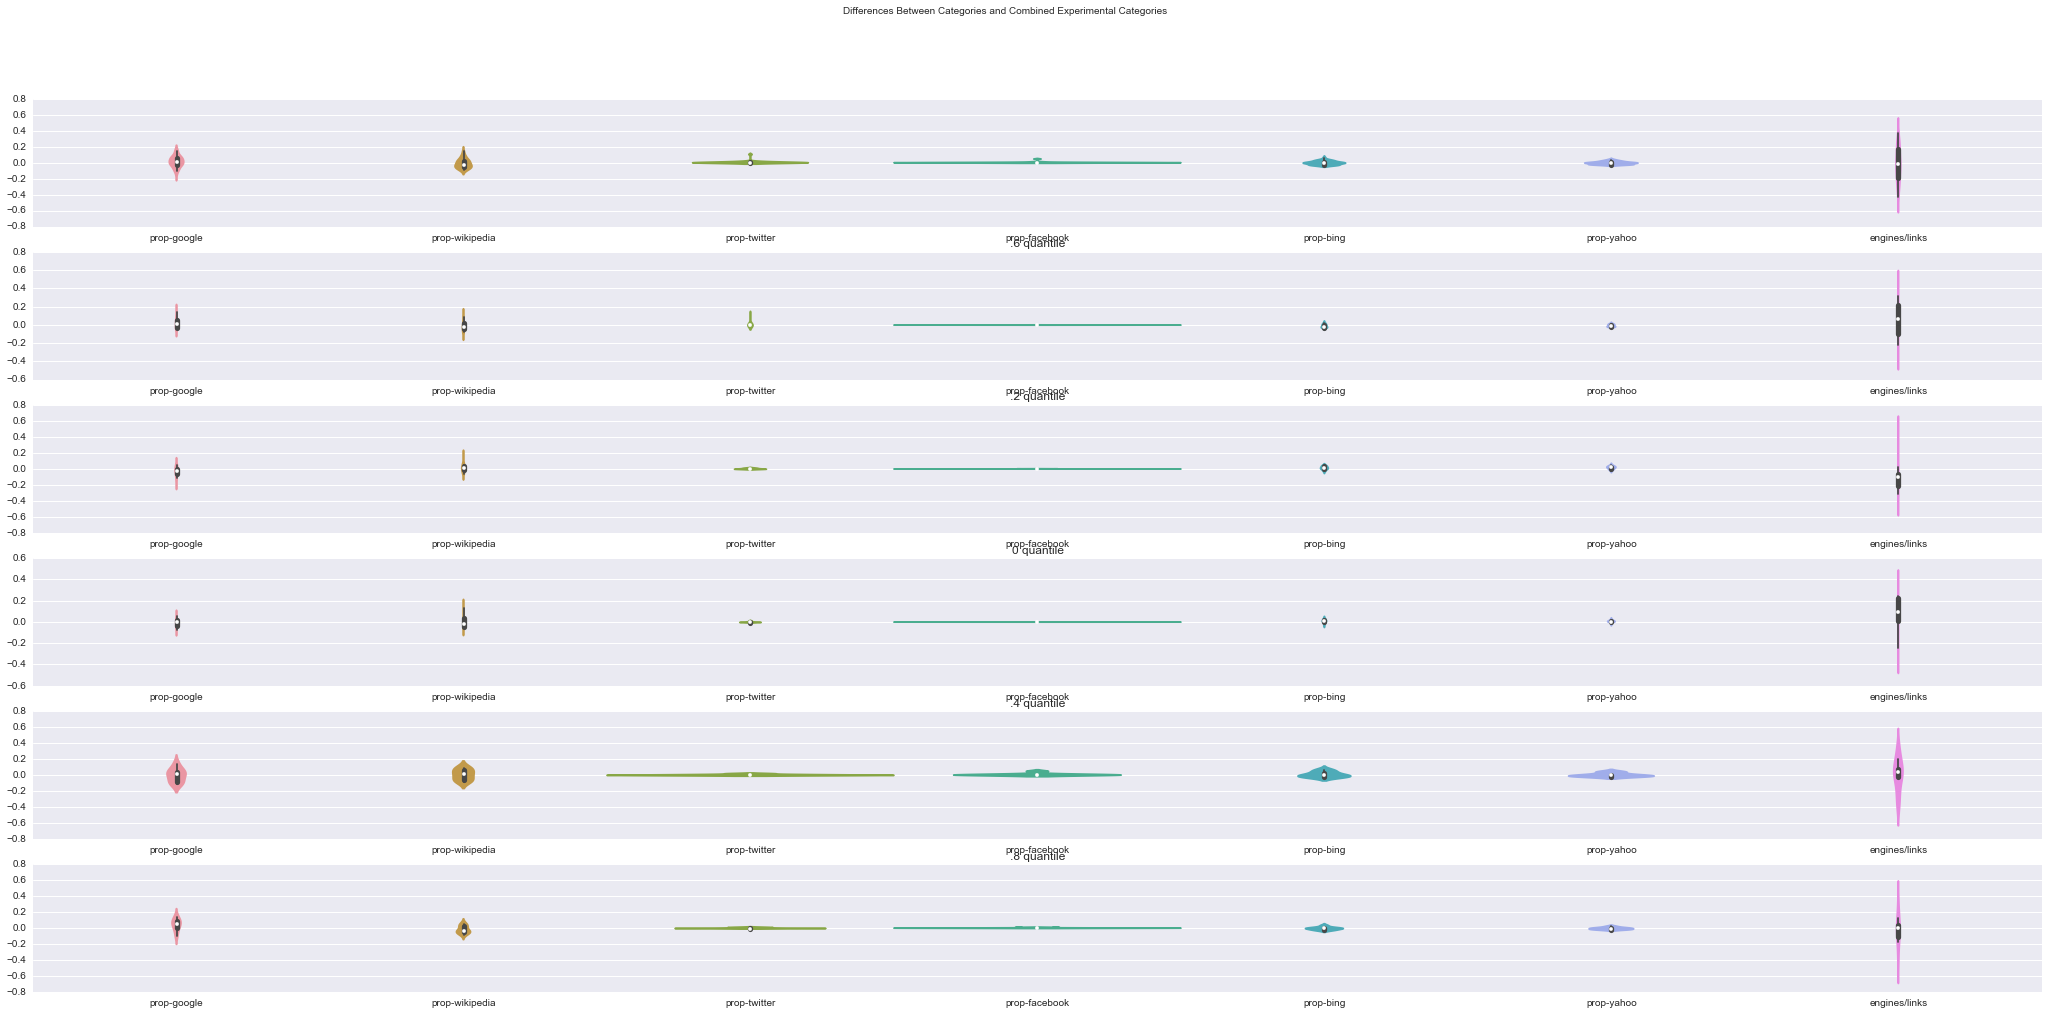

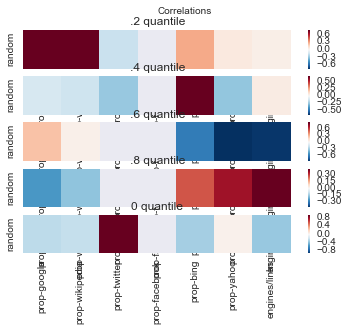

In [3]:
popularity_q_problem.discovery()

1
       prop-google  prop-wikipedia  prop-twitter  prop-facebook  prop-bing  \
count      1.00000         1.00000             1       1.000000   1.000000   
mean       0.27286         0.69071             0       0.003643   0.018579   
std            NaN             NaN           NaN            NaN        NaN   
min        0.27286         0.69071             0       0.003643   0.018579   
25%        0.27286         0.69071             0       0.003643   0.018579   
50%        0.27286         0.69071             0       0.003643   0.018579   
75%        0.27286         0.69071             0       0.003643   0.018579   
max        0.27286         0.69071             0       0.003643   0.018579   

       prop-yahoo  engines/links  
count    1.000000        1.00000  
mean     0.014208        0.05084  
std           NaN            NaN  
min      0.014208        0.05084  
25%      0.014208        0.05084  
50%      0.014208        0.05084  
75%      0.014208        0.05084  
max      0.0142

/Users/shalom/anaconda/envs/py3k/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


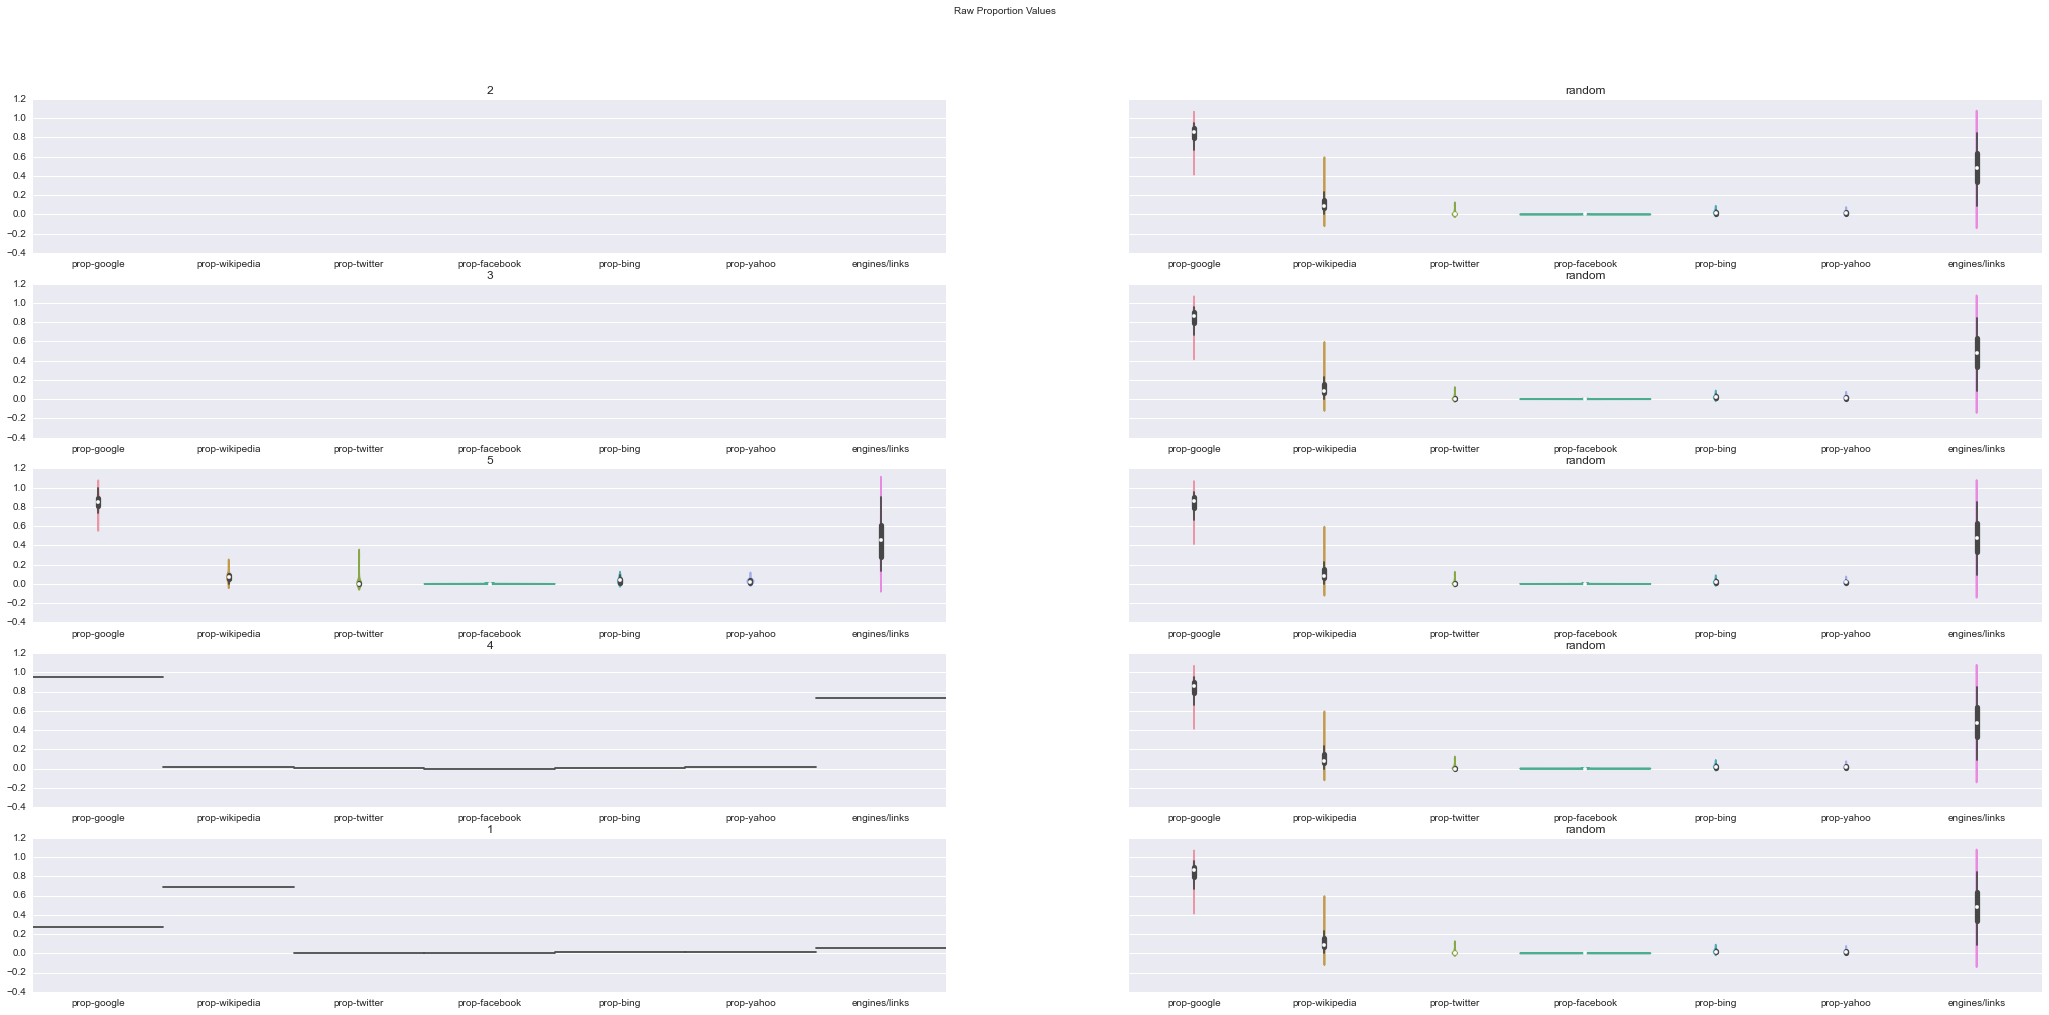

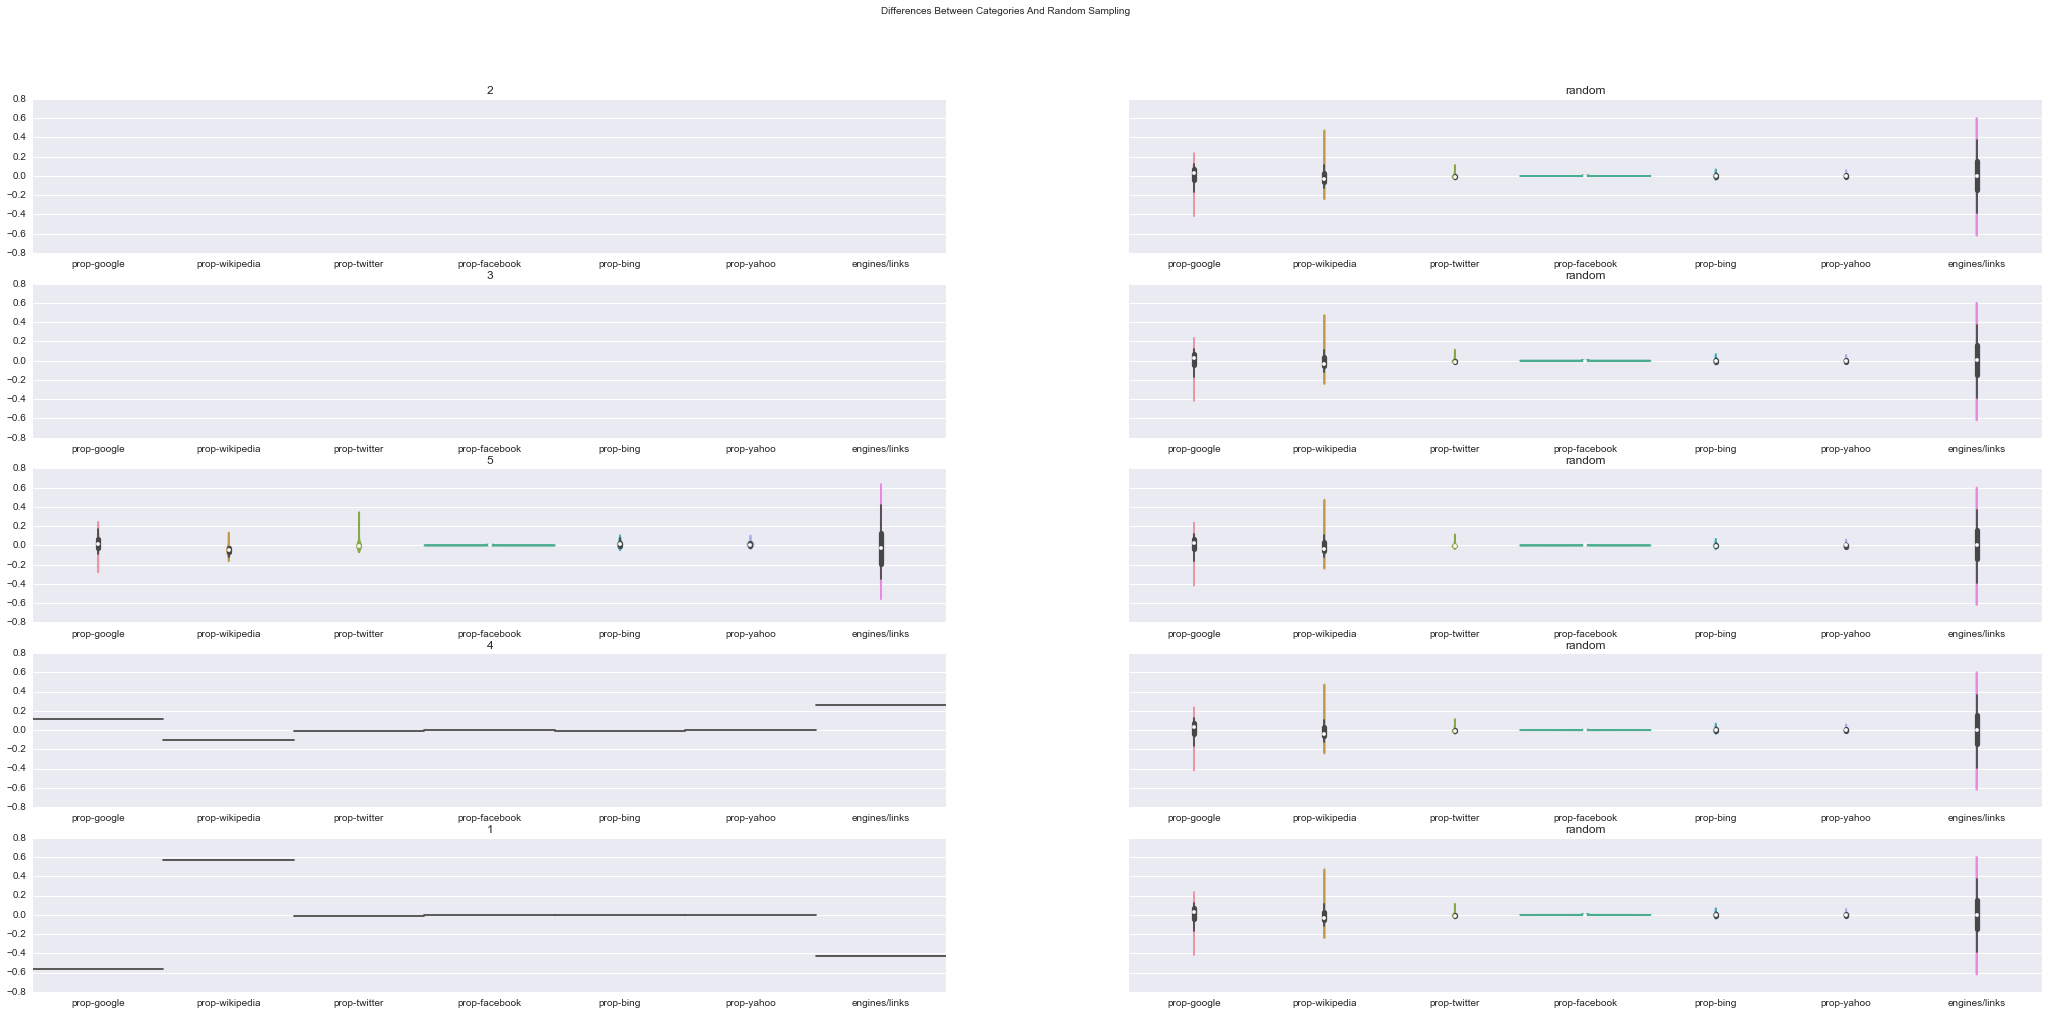

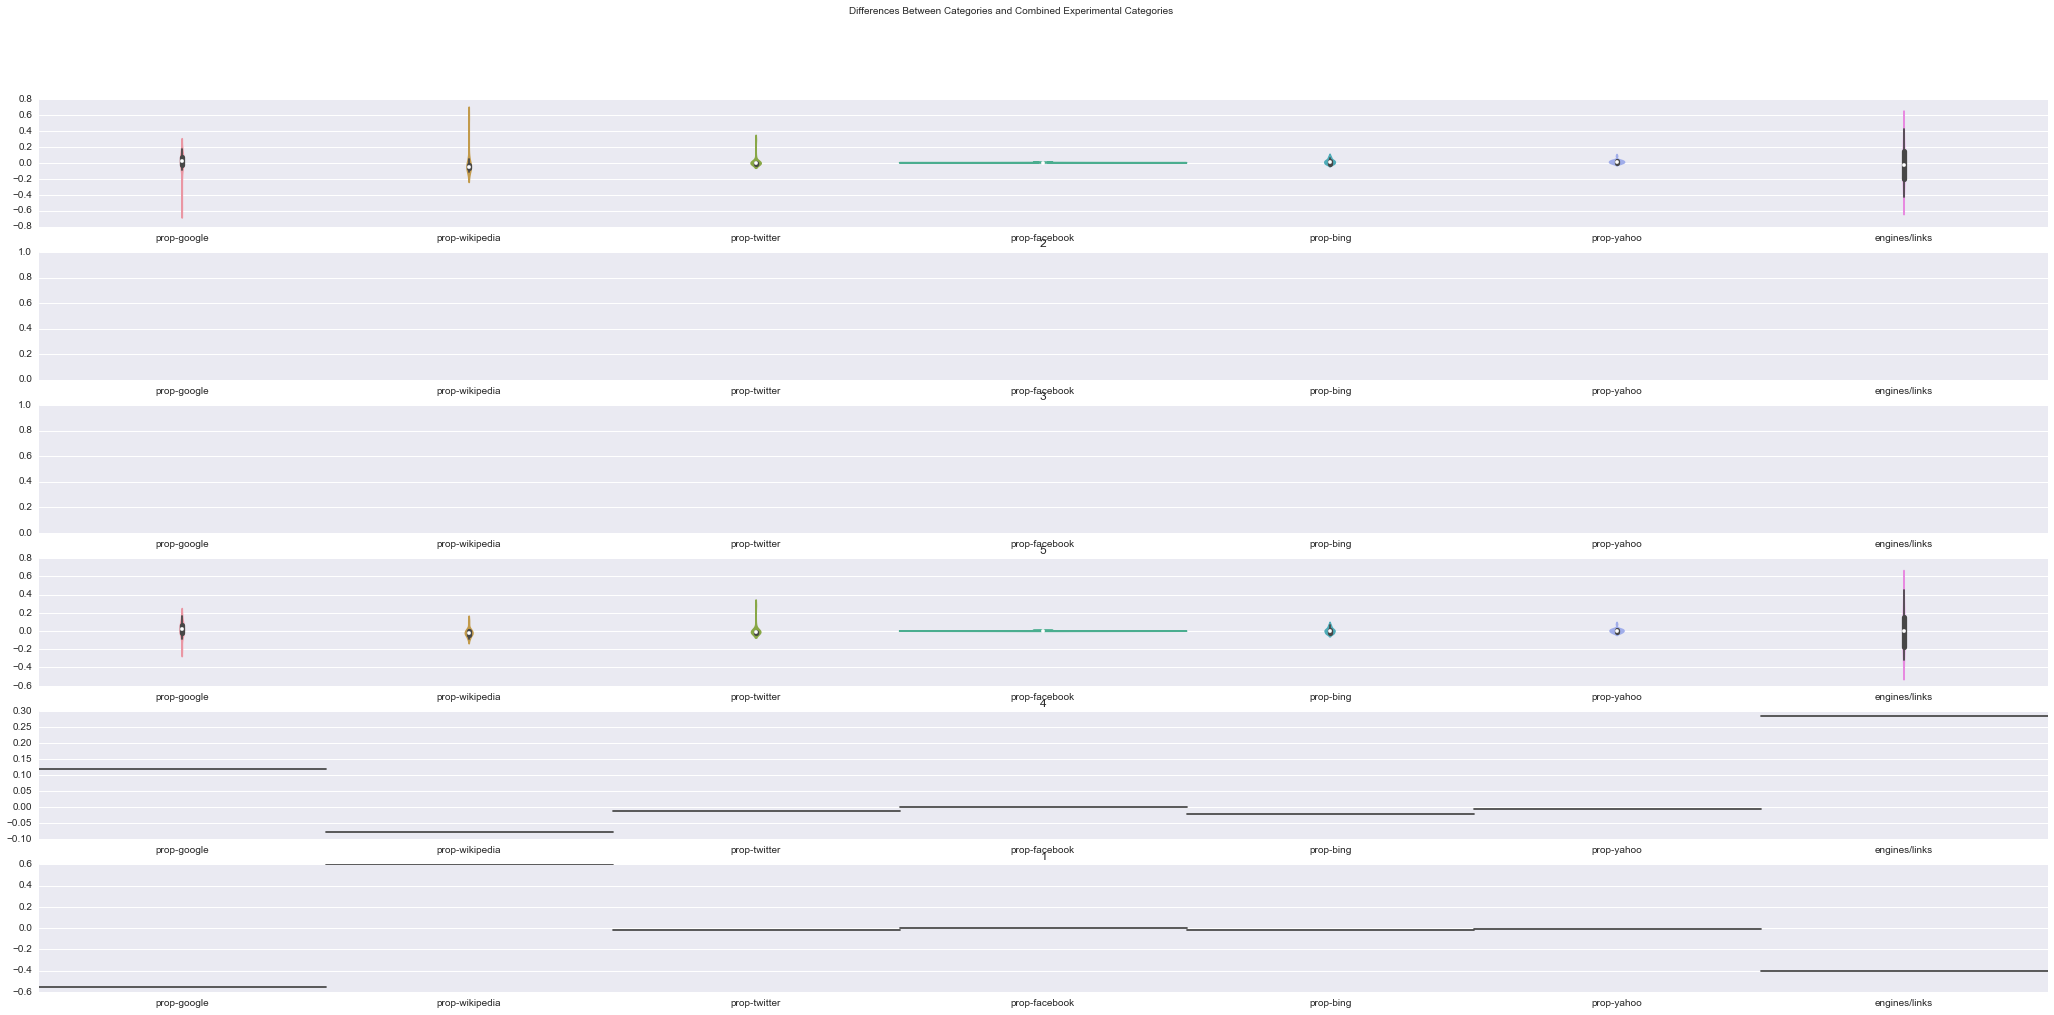

ValueError: zero-size array to reduction operation minimum which has no identity

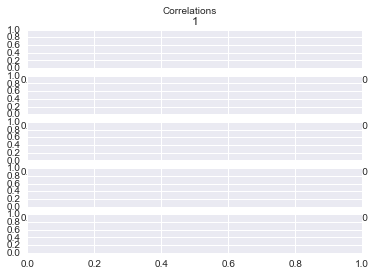

In [4]:
popularity_even_problem.discovery()

Maybe the proportion of wikipedia traffic and the proportion of engines/links cluster together, because they are both 'within the wikipedia site'. Maybe that applies to the concept of stuff people research versus stuff people quickly search for and then leave.

In [ ]:
# A Tool for finding the exact wikipedia names corresponding to phrases.
candidate_phrases = ['tupac','David Foster Wallace', 'paternalism']
for phrase in candidate_phrases:
    most_like(phrase)

In [9]:
for item in ms_problem.experimental['microsoft'].iteritems():
    print(item)

('prop-yahoo', Microsoft_Developer_Network    0.009356
Microsoft_Silverlight          0.036204
Microsoft                      0.017748
Microsoft_Visual_Studio        0.012664
Microsoft_Surface              0.013885
Xbox                           0.017871
OneDrive                       0.070741
Windows_8                      0.011336
Microsoft_Excel                0.024633
Microsoft_Windows              0.018437
Outlook.com                    0.193575
Windows_Media_Player           0.023670
Windows_XP                     0.022778
Windows_NT                     0.014146
Windows_Live                   0.036986
Windows_95                     0.019042
Microsoft_Outlook              0.026944
Kinect                         0.011134
MS-DOS                         0.019940
Microsoft_Office               0.019053
Xbox_360                       0.017870
Windows_Vista                  0.030083
Windows_API                    0.012209
Microsoft_PowerPoint           0.031567
Microsoft_TechNet        